# O – Obtain: Data

This project follows the OSEMN lifecycle (Obtain → Scrub → Explore → Model → iNterpret) to forecast total goals in Bundesliga matches.

In this section we **only obtain raw data** from disk (CSV files) into in-memory pandas DataFrames, without doing any cleaning, merging, or modeling yet.


In [27]:
from pathlib import Path
import pandas as pd

# Project root and data directory
project_root = Path().resolve()
data_dir = project_root / "Data"

# Raw season data (no cleaning or merging here)
df_2023_2024 = pd.read_csv(data_dir / "2023:2024.csv")
df_2024_2025 = pd.read_csv(data_dir / "2024:2025.csv")

# Raw 2025/2026 data
df_2025_2026_raw = pd.read_csv(data_dir / "2025:2026.csv")

print("Raw data imported:")
print(f"  df_2023_2024: {df_2023_2024.shape} (2023/2024 season)")
print(f"  df_2024_2025: {df_2024_2025.shape} (2024/2025 season)")
print(f"  df_2025_2026_raw: {df_2025_2026_raw.shape} (2025/2026 season)")


Raw data imported:
  df_2023_2024: (306, 105) (2023/2024 season)
  df_2024_2025: (306, 119) (2024/2025 season)
  df_2025_2026_raw: (170, 131) (2025/2026 season)


## Raw Match-by-Match Statistics

### Importing Offensive Metrics

In this sub-section we load the **offensive match metrics** needed for our modeling task from the raw CSVs.

- Full-Time Goals
- Half-Time Goals
- Total Shots
- Shots on Target
- Corners


In [28]:
# Offensive metrics: FTHG, FTAG, HTHG, HTAG, HS, AS, HST, AST, HC, AC

offensive_cols = [
    "FTHG", "FTAG",  # full-time goals
    "HTHG", "HTAG",  # half-time goals
    "HS", "AS",      # total shots
    "HST", "AST",    # shots on target
    "HC", "AC"       # corners
]

# Subset to offensive metrics for each season
df_2023_2024_off = df_2023_2024[offensive_cols].copy()
df_2024_2025_off = df_2024_2025[offensive_cols].copy()

# For 2025/2026, keep only rows/columns where these metrics exist (fixtures table may have missing values)
df_2025_2026_off = df_2025_2026_raw[offensive_cols].copy()

print("Offensive metrics dataframes created:")
print(f"  df_2023_2024_off: {df_2023_2024_off.shape}")
print(f"  df_2024_2025_off: {df_2024_2025_off.shape}")
print(f"  df_2025_2026_off: {df_2025_2026_off.shape}")

# Display head of the 2023/2024 offensive metrics
print("\nHead of 2023/2024 offensive metrics:")
print(df_2023_2024_off.head())


Offensive metrics dataframes created:
  df_2023_2024_off: (306, 10)
  df_2024_2025_off: (306, 10)
  df_2025_2026_off: (170, 10)

Head of 2023/2024 offensive metrics:
   FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HC  AC
0     0     4     0     1   6  25    1   10   0   6
1     4     4     3     3  20   9    8    6   8   7
2     1     2     0     2  24  17    5    8   4   2
3     3     2     2     1  11  13    7    6   4   5
4     5     0     2     0  19   4    9    1   7   0


### Defensive & Disciplinary Metrics

In this sub-section we extract **defensive and disciplinary metrics** from the full season tables to support models focused on defensive performance and discipline.

- Fouls Committed (Home/Away)
- Yellow Cards (Home/Away)
- Red Cards (Home/Away)

In [29]:
# Defensive & disciplinary metrics: HF, AF, HY, AY, HR, AR

def_disc_cols = [
    "HF", "AF",  # fouls committed (home/away)
    "HY", "AY",  # yellow cards (home/away)
    "HR", "AR"   # red cards (home/away)  
]

# Subset to defensive & disciplinary metrics for each season
df_2023_2024_defdisc = df_2023_2024[def_disc_cols].copy()
df_2024_2025_defdisc = df_2024_2025[def_disc_cols].copy()

df_2025_2026_defdisc = df_2025_2026_raw[def_disc_cols].copy()

print("Defensive & disciplinary metrics dataframes created:")
print(f"  df_2023_2024_defdisc: {df_2023_2024_defdisc.shape}")
print(f"  df_2024_2025_defdisc: {df_2024_2025_defdisc.shape}")
print(f"  df_2025_2026_defdisc: {df_2025_2026_defdisc.shape}")

# Display head of the 2023/2024 defensive & disciplinary metrics
print("\nHead of 2023/2024 defensive & disciplinary metrics:")
print(df_2023_2024_defdisc.head())


Defensive & disciplinary metrics dataframes created:
  df_2023_2024_defdisc: (306, 6)
  df_2024_2025_defdisc: (306, 6)
  df_2025_2026_defdisc: (170, 6)

Head of 2023/2024 defensive & disciplinary metrics:
   HF  AF  HY  AY  HR  AR
0  16  11   2   1   0   0
1   9  14   1   2   0   0
2   9   9   0   1   0   0
3  13  10   1   2   0   0
4   5  12   1   1   0   0


### Market Sentiment

In this sub-section we derive **market-based measures of team strength and sentiment** using: 
- Average Odds for Home Win, Draw, and Away Win. 

These odds implicitly encode how strong the betting market believes each team is in each fixture.


In [30]:
# Market sentiment & team strength metrics: AvgH, AvgD, AvgA

market_cols = [
    "AvgH",  # average odds for Home Win
    "AvgD",  # average odds for Draw
    "AvgA"   # average odds for Away Win
]

# Subset to market sentiment & team strength metrics for each season
_df_missing_cols_msg = "One or more market odds columns are missing from a dataframe; please verify the raw inputs."

try:
    df_2023_2024_mkt = df_2023_2024[market_cols].copy()
    df_2024_2025_mkt = df_2024_2025[market_cols].copy()
    df_2025_2026_mkt = df_2025_2026_raw[market_cols].copy()
except KeyError as e:
    print(_df_missing_cols_msg)
    raise

print("Market sentiment & team strength dataframes created:")
print(f"  df_2023_2024_mkt: {df_2023_2024_mkt.shape}")
print(f"  df_2024_2025_mkt: {df_2024_2025_mkt.shape}")
print(f"  df_2025_2026_mkt: {df_2025_2026_mkt.shape}")

# Display head of the 2023/2024 market sentiment & team strength metrics
print("\nHead of 2023/2024 market sentiment & team strength metrics:")
print(df_2023_2024_mkt.head())


Market sentiment & team strength dataframes created:
  df_2023_2024_mkt: (306, 3)
  df_2024_2025_mkt: (306, 3)
  df_2025_2026_mkt: (170, 3)

Head of 2023/2024 market sentiment & team strength metrics:
   AvgH  AvgD  AvgA
0  8.50  6.09  1.32
1  2.72  3.69  2.47
2  2.35  3.63  2.94
3  2.47  3.62  2.78
4  1.69  4.17  4.69


### Team Strength

In [31]:
# Understat team strength data: 2022/2023, 2023/2024, 2024/2025

understat_2022_2023_path = project_root / "Data" / "FH_2023:2024.csv"

df_understat_2022_2023 = pd.read_csv(understat_2022_2023_path, sep=";")


print("Example Understat team strength dataframes created:")
print(f"  df_understat_2022_2023: {df_understat_2022_2023.shape}")




Example Understat team strength dataframes created:
  df_understat_2022_2023: (18, 19)


Attacking Quality

In [32]:
# Attacking quality (Understat 2024/2025): team, NPxG, Deep Completions (DC)

attacking_cols = ["team", "NPxG", "deep"]  # 'deep' = Deep Completions (DC)
print("Head of Understat 2022/2023 attacking quality metrics:")
print(df_understat_2022_2023[attacking_cols].head())



Head of Understat 2022/2023 attacking quality metrics:
                     team   NPxG  deep
0           Bayern Munich  81.19   437
1       Borussia Dortmund  72.42   314
2  RasenBallsport Leipzig  63.54   296
3            Union Berlin  29.77   175
4                Freiburg  44.09   217


Defensive Intensity

In [33]:
# Defensive intensity (Understat 2024/2025): PPDA, NPxGA

defensive_cols = ["team", "ppda", "NPxGA"]
print("Head of Understat 2022/2023 defensive intensity metrics:")
print(df_understat_2022_2023[defensive_cols].head())



Head of Understat 2022/2023 defensive intensity metrics:
                     team   ppda  NPxGA
0           Bayern Munich   8.57  29.43
1       Borussia Dortmund  10.25  42.47
2  RasenBallsport Leipzig  10.31  30.93
3            Union Berlin  15.07  37.13
4                Freiburg  12.10  45.12


Overall Capability

In [34]:
# Overall capability (Understat 2024/2025): xPTS, NPxGD

overall_cols = ["team", "xPTS", "NPxGD"]
print("Head of Understat 2022/2023 overall capability metrics:")
print(df_understat_2022_2023[overall_cols].head())



Head of Understat 2022/2023 overall capability metrics:
                     team   xPTS  NPxGD
0           Bayern Munich  71.99  51.76
1       Borussia Dortmund  64.69  29.95
2  RasenBallsport Leipzig  67.51  32.61
3            Union Berlin  42.32  -7.36
4                Freiburg  47.33  -1.02


# S – Scrub: Clean & Structure Data

In this section we turn the raw season tables into a **unified, modeling-ready dataset**, by:
- Adding Season Labels.
- Harmonizing Columns Across Seasons.
- Dropping Inconsistent or Missing-Only Columns

### Adding a Season Column

#### Football-Data.co.uk

In [35]:
from pathlib import Path

# 2023/2024
data_path_2023_2024 = project_root / "Data" / "2023:2024.csv"

df_2023_2024 = pd.read_csv(data_path_2023_2024)
df_2023_2024['Season'] = '2023:2024'
print("DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:")
display(df_2023_2024.head())

# 2024/2025
data_path_2024_2025 = project_root / "Data" / "2024:2025.csv"

df_2024_2025 = pd.read_csv(data_path_2024_2025)
df_2024_2025['Season'] = '2024:2025'
print("DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:")
display(df_2024_2025.head())



DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0,1,A,6,25,1,10,16,11,0,6,2,1,0,0,7.50,6.50,1.30,8.00,6.0,1.31,7.00,5.25,1.40,8.59,6.36,1.33,8.00,5.50,1.22,9.00,6.0,...,1.30,8.50,6.0,1.3,7.00,5.25,1.40,8.80,6.30,1.31,8.00,5.50,1.22,9.50,6.00,1.29,9.50,6.50,1.40,8.69,6.05,1.31,1.36,3.2,1.34,3.38,1.40,3.58,1.34,3.29,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3,3,D,20,9,8,6,9,14,8,7,1,2,0,0,2.70,3.60,2.45,2.70,3.5,2.45,2.75,3.60,2.45,2.74,3.78,2.51,2.50,3.40,2.30,2.70,3.7,...,2.38,2.75,3.6,2.4,2.75,3.65,2.45,2.92,3.72,2.43,2.50,3.40,2.30,2.75,3.75,2.38,2.92,3.87,2.51,2.79,3.67,2.42,1.62,2.3,1.67,2.33,1.67,2.40,1.62,2.31,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0,2,A,24,17,5,8,9,9,4,2,0,1,0,0,2.30,3.60,2.90,2.25,3.5,3.10,2.30,3.55,2.95,2.43,3.67,2.92,2.10,3.40,2.80,2.38,3.6,...,3.10,2.20,3.6,3.1,2.25,3.60,3.00,2.20,3.74,3.32,2.10,3.40,2.80,2.15,3.75,3.13,2.30,3.87,3.32,2.20,3.68,3.15,1.67,2.2,1.69,2.28,1.70,2.36,1.65,2.26,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2,1,H,11,13,7,6,13,10,4,5,1,2,0,0,2.45,3.60,2.75,2.45,3.6,2.70,2.50,3.55,2.70,2.50,3.61,2.85,2.30,3.25,2.60,2.45,3.6,...,2.80,2.37,3.5,2.8,2.50,3.60,2.70,2.48,3.63,2.98,2.30,3.25,2.60,2.40,3.60,2.80,2.50,3.78,2.99,2.44,3.60,2.81,1.67,2.2,1.74,2.20,1.75,2.32,1.68,2.19,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2,0,H,19,4,9,1,5,12,7,0,1,1,0,0,1.65,4.33,4.50,1.68,4.0,4.75,1.70,4.10,4.50,1.70,4.25,4.78,1.57,3.90,4.33,1.70,4.1,...,4.20,1.77,3.9,4.2,1.77,4.10,4.20,1.78,4.16,4.52,1.67,3.60,4.00,1.73,4.10,4.33,1.85,4.20,4.52,1.76,4.02,4.32,1.62,2.3,1.67,2.33,1.70,2.35,1.64,2.26,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:


/var/folders/3l/3r33nlzx08x33ms97984bk_m0000gn/T/ipykernel_16069/1423083037.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2024_2025['Season'] = '2024:2025'


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,BFH,BFD,BFA,PSH,PSD,PSA,WHH,WHD,WHA,1XBH,1XBD,...,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,1XBCH,1XBCD,1XBCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,BFEC>2.5,BFEC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,Season
0,D1,23/08/2024,19:30,M'gladbach,Leverkusen,2,3,A,0.0,2.0,A,14.0,25.0,7.0,9.0,11.0,7.0,2.0,4.0,1.0,0.0,0.0,0.0,5.25,4.5,1.55,5.00,4.4,1.58,5.00,4.50,1.60,5.33,4.58,1.60,5.00,4.33,1.57,5.39,4.78,...,4.94,4.38,1.67,5.00,4.40,1.57,5.13,4.62,1.62,5.60,4.62,1.67,5.09,4.46,1.60,5.40,4.50,1.68,1.44,2.75,1.48,2.79,1.48,2.90,1.45,2.80,1.50,2.96,1.0,1.86,2.04,1.87,2.06,1.96,2.08,1.91,1.96,1.91,2.07,2024:2025
1,D1,24/08/2024,14:30,Augsburg,Werder Bremen,2,2,D,2.0,1.0,H,10.0,12.0,3.0,6.0,11.0,10.0,4.0,2.0,3.0,1.0,0.0,0.0,2.20,3.6,3.10,2.25,3.5,3.00,2.25,3.60,3.10,2.32,3.55,3.11,2.25,3.50,3.10,2.31,3.80,...,2.57,3.61,2.77,2.45,3.60,2.70,2.51,3.69,2.77,2.57,3.69,3.16,2.46,3.54,2.82,2.60,3.65,2.90,1.67,2.20,1.71,2.26,1.75,2.30,1.69,2.21,1.74,2.28,0.0,1.88,2.05,1.88,2.04,1.88,2.06,1.86,2.03,1.90,2.10,2024:2025
2,D1,24/08/2024,14:30,Freiburg,Stuttgart,3,1,H,1.0,1.0,D,15.0,9.0,4.0,2.0,7.0,10.0,6.0,3.0,2.0,1.0,0.0,0.0,3.50,3.6,2.05,3.40,3.6,2.05,3.50,3.60,2.05,3.50,3.70,2.09,3.50,3.70,2.00,3.58,3.87,...,3.73,3.99,1.96,3.60,3.70,2.00,3.95,3.90,1.92,3.95,3.99,2.11,3.62,3.81,1.98,3.80,4.00,2.04,1.53,2.50,1.56,2.58,1.61,2.62,1.55,2.43,1.59,2.66,0.5,1.95,1.98,1.95,1.97,1.98,2.09,1.87,2.00,1.95,2.04,2024:2025
3,D1,24/08/2024,14:30,Hoffenheim,Holstein Kiel,3,2,H,2.0,0.0,H,20.0,15.0,8.0,6.0,8.0,14.0,8.0,6.0,2.0,3.0,0.0,1.0,1.65,4.5,4.50,1.65,4.2,4.60,1.62,4.33,5.00,1.64,4.38,5.07,1.65,4.20,4.75,1.69,4.52,...,1.61,4.68,5.05,1.60,4.50,4.80,1.61,4.82,4.99,1.70,4.82,5.10,1.62,4.54,4.87,1.64,4.70,5.40,1.40,3.00,1.45,2.89,1.56,3.00,1.45,2.77,1.47,3.00,-1.0,2.03,1.90,1.99,1.93,2.16,1.95,2.02,1.86,2.00,1.95,2024:2025
4,D1,24/08/2024,14:30,Mainz,Union Berlin,1,1,D,0.0,0.0,D,15.0,15.0,3.0,4.0,9.0,15.0,8.0,9.0,1.0,3.0,0.0,0.0,2.00,3.4,3.90,2.00,3.3,3.90,2.05,3.30,4.00,2.08,3.24,4.10,2.05,3.20,3.90,2.11,3.37,...,2.10,3.39,3.90,2.05,3.25,3.80,2.10,3.38,3.85,2.15,3.50,3.99,2.08,3.34,3.80,2.18,3.40,3.95,2.07,1.83,2.09,1.83,2.27,1.87,2.07,1.79,2.14,1.85,-0.5,2.10,1.83,2.11,1.83,2.13,1.85,2.07,1.81,2.18,1.84,2024:2025


#### Understat

In [36]:
# Add Season column to Understat team-strength tables

understat_2022_2023_path = project_root / "Data" / "understat_2022:2023.csv"
understat_2023_2024_path = project_root / "Data" / "understat_2023:2024.csv"
understat_2024_2025_path = project_root / "Data" / "understat_2024:2025.csv"

df_understat_2022_2023 = pd.read_csv(understat_2022_2023_path, sep=";")
df_understat_2023_2024 = pd.read_csv(understat_2023_2024_path, sep=";")
df_understat_2024_2025 = pd.read_csv(understat_2024_2025_path, sep=";")

df_understat_2022_2023["Season"] = "2022:2023"
df_understat_2023_2024["Season"] = "2023:2024"
df_understat_2024_2025["Season"] = "2024:2025"

print("Understat DataFrames loaded and 'Season' column added. Displaying heads:")
display(df_understat_2022_2023.head())
display(df_understat_2023_2024.head())
display(df_understat_2024_2025.head())



FileNotFoundError: [Errno 2] No such file or directory: '/Users/homecon/Downloads/2026/Sports Analytics/Data/understat_2022:2023.csv'

In [55]:
# FH 2023-2024 attacking quality (team-level) and team-name mapping

import pandas as pd

fh_2023_2024_path = data_dir / "FH_2023:2024.csv"
df_fh_2023_2024 = pd.read_csv(fh_2023_2024_path, sep=";")

# Keep only attacking-quality columns we need
fh_attacking = df_fh_2023_2024[["team", "NPxG", "deep"]].copy()

# Map match-data team names -> FH team names where they differ
team_name_map = {
    "RB Leipzig": "RasenBallsport Leipzig",
    "M'gladbach": "Borussia M.Gladbach",
    "Ein Frankfurt": "Eintracht Frankfurt",
    "FC Koln": "FC Cologne",
    "Mainz": "Mainz 05",
    "Stuttgart": "VfB Stuttgart",
    "Leverkusen": "Bayer Leverkusen",
    "Dortmund": "Borussia Dortmund",
}

print("FH 2023-2024 attacking quality loaded (teams, NPxG, deep):", fh_attacking.shape)
print(fh_attacking.head())
print("\nTeam-name mapping for FH merge:")
for k, v in team_name_map.items():
    print(f"  {k!r} -> {v!r}")



FH 2023-2024 attacking quality loaded (teams, NPxG, deep): (18, 3)
                     team   NPxG  deep
0           Bayern Munich  81.19   437
1       Borussia Dortmund  72.42   314
2  RasenBallsport Leipzig  63.54   296
3            Union Berlin  29.77   175
4                Freiburg  44.09   217

Team-name mapping for FH merge:
  'RB Leipzig' -> 'RasenBallsport Leipzig'
  "M'gladbach" -> 'Borussia M.Gladbach'
  'Ein Frankfurt' -> 'Eintracht Frankfurt'
  'FC Koln' -> 'FC Cologne'
  'Mainz' -> 'Mainz 05'
  'Stuttgart' -> 'VfB Stuttgart'
  'Leverkusen' -> 'Bayer Leverkusen'
  'Dortmund' -> 'Borussia Dortmund'


### Dropping Inconsistent or Missing-Only Columns before Merging Raw CSVs

Getting all columns that are missing in either dataset (these will be dropped after merge)


In [38]:
# Find columns present in one dataframe but not the other
cols_2023 = set(df_2023_2024.columns)
cols_2024 = set(df_2024_2025.columns)

missing_in_2024 = cols_2023 - cols_2024
missing_in_2023 = cols_2024 - cols_2023

print(f"Number of columns in df_2023_2024: {len(cols_2023)}")
print(f"Number of columns in df_2024_2025: {len(cols_2024)}")
print(f"Columns present in df_2023_2024 but missing in df_2024_2025 ({len(missing_in_2024)}):")
print(missing_in_2024)
print(f"Columns present in df_2024_2025 but missing in df_2023_2024 ({len(missing_in_2023)}):")
print(missing_in_2023)

# Store missing columns in a DataFrame for reference and later dropping
missing_columns_data = {
    'Column': list(missing_in_2024) + list(missing_in_2023),
    'Missing_In': ['df_2024_2025'] * len(missing_in_2024) + ['df_2023_2024'] * len(missing_in_2023),
    'Source_DataFrame': ['df_2023_2024'] * len(missing_in_2024) + ['df_2024_2025'] * len(missing_in_2023)
}
missing_columns_df = pd.DataFrame(missing_columns_data)
missing_columns_df = missing_columns_df.sort_values(['Missing_In', 'Column']).reset_index(drop=True)

print("\n" + "=" * 80)
print("Missing Columns DataFrame:")
print("=" * 80)
display(missing_columns_df)

# Get all columns that are missing in either dataset (these will be dropped after merge)
all_missing_columns = list(missing_in_2024 | missing_in_2023)
print(f"\nTotal unique columns to drop after merge: {len(all_missing_columns)}")
print(f"Columns to drop: {sorted(all_missing_columns)}")


Number of columns in df_2023_2024: 106
Number of columns in df_2024_2025: 120
Columns present in df_2023_2024 but missing in df_2024_2025 (12):
{'IWCA', 'IWD', 'VCA', 'VCD', 'VCCD', 'IWH', 'VCCH', 'VCCA', 'IWCH', 'VCH', 'IWA', 'IWCD'}
Columns present in df_2024_2025 but missing in df_2023_2024 (26):
{'BFEH', 'BFCH', 'BFD', '1XBCD', 'BFED', 'BFEC<2.5', 'BFH', 'BFE>2.5', 'BFEAHA', 'BFECH', '1XBD', '1XBH', 'BFECD', '1XBCA', 'BFEA', 'BFE<2.5', 'BFCD', '1XBA', '1XBCH', 'BFA', 'BFEC>2.5', 'BFECA', 'BFEAHH', 'BFCA', 'BFECAHH', 'BFECAHA'}

Missing Columns DataFrame:


,Column,Missing_In,Source_DataFrame
0,1XBA,df_2023_2024,df_2024_2025
1,1XBCA,df_2023_2024,df_2024_2025
2,1XBCD,df_2023_2024,df_2024_2025
3,1XBCH,df_2023_2024,df_2024_2025
4,1XBD,df_2023_2024,df_2024_2025
...,...,...,...
33,VCCA,df_2024_2025,df_2023_2024
34,VCCD,df_2024_2025,df_2023_2024
35,VCCH,df_2024_2025,df_2023_2024
36,VCD,df_2024_2025,df_2023_2024



Total unique columns to drop after merge: 38
Columns to drop: ['1XBA', '1XBCA', '1XBCD', '1XBCH', '1XBD', '1XBH', 'BFA', 'BFCA', 'BFCD', 'BFCH', 'BFD', 'BFE<2.5', 'BFE>2.5', 'BFEA', 'BFEAHA', 'BFEAHH', 'BFEC<2.5', 'BFEC>2.5', 'BFECA', 'BFECAHA', 'BFECAHH', 'BFECD', 'BFECH', 'BFED', 'BFEH', 'BFH', 'IWA', 'IWCA', 'IWCD', 'IWCH', 'IWD', 'IWH', 'VCA', 'VCCA', 'VCCD', 'VCCH', 'VCD', 'VCH']


Mapping missing column acronyms to readable names


In [39]:
# Map missing column acronyms to readable names based on football-data.co.uk notes
# Reference: Data/football-data.co.uk_notes.txt.pdf

print("=" * 80)
print("MISSING COLUMNS MAPPING - Readable Names")
print("=" * 80)

print("\nColumns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):")
print("-" * 80)

missing_2024_readable = {
    'VCH': 'VC Bet home win odds (now BetVictor)',
    'VCD': 'VC Bet draw odds (now BetVictor)',
    'VCA': 'VC Bet away win odds (now BetVictor)',
    'VCCH': 'VC Bet closing home win odds (now BetVictor)',
    'VCCD': 'VC Bet closing draw odds (now BetVictor)',
    'VCCA': 'VC Bet closing away win odds (now BetVictor)',
    'IWH': 'Interwetten home win odds',
    'IWD': 'Interwetten draw odds',
    'IWA': 'Interwetten away win odds',
    'IWCH': 'Interwetten closing home win odds',
    'IWCD': 'Interwetten closing draw odds',
    'IWCA': 'Interwetten closing away win odds'
}

for col in sorted(missing_in_2024):
    readable = missing_2024_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\nColumns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):")
print("-" * 80)

missing_2023_readable = {
    # 1XBet odds
    '1XBH': '1XBet home win odds',
    '1XBD': '1XBet draw odds',
    '1XBA': '1XBet away win odds',
    '1XBCH': '1XBet closing home win odds',
    '1XBCD': '1XBet closing draw odds',
    '1XBCA': '1XBet closing away win odds',
    
    # Betfair regular odds
    'BFH': 'Betfair home win odds',
    'BFD': 'Betfair draw odds',
    'BFA': 'Betfair away win odds',
    'BFCH': 'Betfair closing home win odds',
    'BFCD': 'Betfair closing draw odds',
    'BFCA': 'Betfair closing away win odds',
    
    # Betfair Exchange odds
    'BFEH': 'Betfair Exchange home win odds',
    'BFED': 'Betfair Exchange draw odds',
    'BFEA': 'Betfair Exchange away win odds',
    
    # Betfair Exchange total goals
    'BFE>2.5': 'Betfair Exchange over 2.5 goals',
    'BFE<2.5': 'Betfair Exchange under 2.5 goals',
    'BFEC>2.5': 'Betfair Exchange closing over 2.5 goals',
    'BFEC<2.5': 'Betfair Exchange closing under 2.5 goals',
    
    # Betfair Exchange Asian handicap
    'BFEAHH': 'Betfair Exchange Asian handicap home team odds',
    'BFEAHA': 'Betfair Exchange Asian handicap away team odds',
    'BFECAHH': 'Betfair Exchange closing Asian handicap home team odds',
    'BFECAHA': 'Betfair Exchange closing Asian handicap away team odds'
}

for col in sorted(missing_in_2023):
    readable = missing_2023_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\n" + "=" * 80)
print("SUMMARY:")
print("=" * 80)
print(f"• df_2023_2024 missing columns: Mostly VC Bet (now BetVictor) and Interwetten odds")
print(f"• df_2024_2025 missing columns: Mostly 1XBet and Betfair Exchange odds")
print(f"• These differences reflect changes in bookmaker data availability between seasons")
print("=" * 80)


MISSING COLUMNS MAPPING - Readable Names

Columns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):
--------------------------------------------------------------------------------
  • IWA          → Interwetten away win odds
  • IWCA         → Interwetten closing away win odds
  • IWCD         → Interwetten closing draw odds
  • IWCH         → Interwetten closing home win odds
  • IWD          → Interwetten draw odds
  • IWH          → Interwetten home win odds
  • VCA          → VC Bet away win odds (now BetVictor)
  • VCCA         → VC Bet closing away win odds (now BetVictor)
  • VCCD         → VC Bet closing draw odds (now BetVictor)
  • VCCH         → VC Bet closing home win odds (now BetVictor)
  • VCD          → VC Bet draw odds (now BetVictor)
  • VCH          → VC Bet home win odds (now BetVictor)

Columns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):
--------------------------------------------------------------------------------
  • 1XBA         → 1XBet 

### Merging

- Merging the two datasets using `pd.concat` to combine `df_2023_2024` and `df_2024_2025` vertically, resetting the index, and then displaying the head of the resulting `merged_df` to confirm the operation.


In [40]:
# Merge the two dataframes
merged_df = pd.concat([df_2023_2024, df_2024_2025], ignore_index=True)

# Drop all columns that are missing in either dataset (stored in all_missing_columns)
print(f"Before dropping missing columns: {merged_df.shape[1]} columns")
merged_df = merged_df.drop(columns=all_missing_columns, errors='ignore')
print(f"After dropping missing columns: {merged_df.shape[1]} columns")
print(f"Dropped {len(all_missing_columns)} columns that were missing in one of the datasets")

print("\nDataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:")
display(merged_df.head())


Before dropping missing columns: 132 columns
After dropping missing columns: 94 columns
Dropped 38 columns that were missing in one of the datasets

DataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,PSH,PSD,PSA,WHH,WHD,WHA,MaxH,MaxD,MaxA,AvgH,AvgD,...,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0.0,1.0,A,6.0,25.0,1.0,10.0,16.0,11.0,0.0,6.0,2.0,1.0,0.0,0.0,7.50,6.50,1.30,8.00,6.0,1.31,8.59,6.36,1.33,8.00,5.50,1.22,9.50,6.50,1.40,8.50,6.09,...,NaN,NaN,1.84,2.01,8.50,6.0,1.30,8.50,6.0,1.3,8.80,6.30,1.31,8.00,5.50,1.22,9.50,6.50,1.40,8.69,6.05,1.31,1.36,3.2,1.34,3.38,1.40,3.58,1.34,3.29,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3.0,3.0,D,20.0,9.0,8.0,6.0,9.0,14.0,8.0,7.0,1.0,2.0,0.0,0.0,2.70,3.60,2.45,2.70,3.5,2.45,2.74,3.78,2.51,2.50,3.40,2.30,2.80,3.88,2.54,2.72,3.69,...,2.07,1.90,2.02,1.84,2.80,3.6,2.38,2.75,3.6,2.4,2.92,3.72,2.43,2.50,3.40,2.30,2.92,3.87,2.51,2.79,3.67,2.42,1.62,2.3,1.67,2.33,1.67,2.40,1.62,2.31,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0.0,2.0,A,24.0,17.0,5.0,8.0,9.0,9.0,4.0,2.0,0.0,1.0,0.0,0.0,2.30,3.60,2.90,2.25,3.5,3.10,2.43,3.67,2.92,2.10,3.40,2.80,2.50,3.85,3.10,2.35,3.63,...,2.11,1.88,2.03,1.82,2.15,3.6,3.10,2.20,3.6,3.1,2.20,3.74,3.32,2.10,3.40,2.80,2.30,3.87,3.32,2.20,3.68,3.15,1.67,2.2,1.69,2.28,1.70,2.36,1.65,2.26,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2.0,1.0,H,11.0,13.0,7.0,6.0,13.0,10.0,4.0,5.0,1.0,2.0,0.0,0.0,2.45,3.60,2.75,2.45,3.6,2.70,2.50,3.61,2.85,2.30,3.25,2.60,2.56,3.75,2.91,2.47,3.62,...,1.89,2.11,1.82,2.05,2.38,3.6,2.80,2.37,3.5,2.8,2.48,3.63,2.98,2.30,3.25,2.60,2.50,3.78,2.99,2.44,3.60,2.81,1.67,2.2,1.74,2.20,1.75,2.32,1.68,2.19,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2.0,0.0,H,19.0,4.0,9.0,1.0,5.0,12.0,7.0,0.0,1.0,1.0,0.0,0.0,1.65,4.33,4.50,1.68,4.0,4.75,1.70,4.25,4.78,1.57,3.90,4.33,1.77,4.40,5.00,1.69,4.17,...,1.95,2.04,1.86,1.98,1.73,4.2,4.20,1.77,3.9,4.2,1.78,4.16,4.52,1.67,3.60,4.00,1.85,4.20,4.52,1.76,4.02,4.32,1.62,2.3,1.67,2.33,1.70,2.35,1.64,2.26,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


### Filtering

Using the lists of columns generated previously: offensive_cols, def_disc_cols, and market_cols and adding for identification; 
- Date
- HomeTeam/AwayTeam 

In [41]:
id_cols = ["Date", "HomeTeam", "AwayTeam"]
# Concatenate all unique columns from these three lists, then add id columns to the *front* if they're not already there
all_stat_cols = list(dict.fromkeys(id_cols + offensive_cols + def_disc_cols + market_cols))  # preserve order, remove duplicates

# Keep only those columns that are in merged_df
filtered_stat_cols = [col for col in all_stat_cols if col in merged_df.columns]

filtered_df = merged_df[filtered_stat_cols]

print("Selected columns (filtered_stat_cols):", filtered_stat_cols)
print("Shape:", filtered_df.shape)
display(filtered_df.head())
print("\nNumber of columns in filtered_df:", filtered_df.shape[1])


Selected columns (filtered_stat_cols): ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA']
Shape: (612, 22)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,AvgH,AvgD,AvgA
0,18/08/2023,Werder Bremen,Bayern Munich,0,4,0.0,1.0,6.0,25.0,1.0,10.0,0.0,6.0,16.0,11.0,2.0,1.0,0.0,0.0,8.50,6.09,1.32
1,19/08/2023,Augsburg,M'gladbach,4,4,3.0,3.0,20.0,9.0,8.0,6.0,8.0,7.0,9.0,14.0,1.0,2.0,0.0,0.0,2.72,3.69,2.47
2,19/08/2023,Hoffenheim,Freiburg,1,2,0.0,2.0,24.0,17.0,5.0,8.0,4.0,2.0,9.0,9.0,0.0,1.0,0.0,0.0,2.35,3.63,2.94
3,19/08/2023,Leverkusen,RB Leipzig,3,2,2.0,1.0,11.0,13.0,7.0,6.0,4.0,5.0,13.0,10.0,1.0,2.0,0.0,0.0,2.47,3.62,2.78
4,19/08/2023,Stuttgart,Bochum,5,0,2.0,0.0,19.0,4.0,9.0,1.0,7.0,0.0,5.0,12.0,1.0,1.0,0.0,0.0,1.69,4.17,4.69



Number of columns in filtered_df: 22


### Possession Proxy

**Rationale:** Teams with high possession percentages typically generate the majority of attacking statistics (shots and corners). Instead of relying on explicit possession %, we construct a **possession proxy** from observable attacking events.

**Proxy Formula**

- Total Attacking Events in a match:
  - TotalAttackingEvents = (HS + AS) + (HC + AC) 
  where:
    - HS, AS: Home/Away Shots
    - HC, AC: Home/Away Corners

- Home Team Possession Proxy: ProxyHome = (HS + HC) / (TotalAttackingEvents)

- Away Team Possession Proxy: ProxyAway = 1 - ProxyHome


This treats the share of attacking events as a proxy for the share of possession: the side generating more shots and corners is assumed to have had more of the ball.

Potential Improvement: High possession teams play with a higher defensive line (forcing offsides).

Dominance Proxy from Attacking Events

Adds
- HomeDominanceProxy
- AwayDominanceProxy

In [42]:
import pandas as pd
import numpy as np

# Ensure filtered_df exists (it should be created in the prior filtering step)
if 'filtered_df' not in globals():
    raise NameError("`filtered_df` not found. Run the cell that creates `filtered_df = merged_df[filtered_stat_cols]` first.")

required_cols = {'HS', 'AS', 'HC', 'AC'}
missing_cols = required_cols - set(filtered_df.columns)
if missing_cols:
    raise ValueError(f"filtered_df is missing required columns for possession proxy: {sorted(missing_cols)}")

# Avoid SettingWithCopy warnings if filtered_df is a view
filtered_df = filtered_df.copy()

# Total attacking events per match (row-wise)
total_attacking_events = (
    (filtered_df['HS'] + filtered_df['AS']) +
    (filtered_df['HC'] + filtered_df['AC'])
)

# Avoid divide-by-zero: where total is 0, set to NaN (no attacking info to infer possession)
total_attacking_events_safe = total_attacking_events.replace(0, np.nan)

# Home and away possession proxies (match-specific, row-wise)
home_dominance_proxy = (filtered_df['HS'] + filtered_df['HC']) / total_attacking_events_safe
away_dominance_proxy = 1.0 - home_dominance_proxy

filtered_df['HomeDominanceProxy'] = home_dominance_proxy
filtered_df['AwayDominanceProxy'] = away_dominance_proxy

print("Possession proxy columns added to filtered_df:")
print(filtered_df[['Date', 'HomeTeam', 'AwayTeam', 'HomeDominanceProxy', 'AwayDominanceProxy']].head())

Possession proxy columns added to filtered_df:
         Date       HomeTeam       AwayTeam  HomeDominanceProxy  AwayDominanceProxy
0  18/08/2023  Werder Bremen  Bayern Munich            0.162162            0.837838
1  19/08/2023       Augsburg     M'gladbach            0.636364            0.363636
2  19/08/2023     Hoffenheim       Freiburg            0.595745            0.404255
3  19/08/2023     Leverkusen     RB Leipzig            0.454545            0.545455
4  19/08/2023      Stuttgart         Bochum            0.866667            0.133333


Foul Control Proxy from Fouls

Adds
- FoulControlHome
- FoulControlAway

In [43]:
import pandas as pd
import numpy as np

# Ensure filtered_df exists
if 'filtered_df' not in globals():
    raise NameError("`filtered_df` not found. Run the cell that creates `filtered_df = merged_df[filtered_stat_cols]` first.")

required_foul_cols = {'HF', 'AF'}
missing_foul_cols = required_foul_cols - set(filtered_df.columns)
if missing_foul_cols:
    raise ValueError(f"filtered_df is missing required columns for foul control: {sorted(missing_foul_cols)}")

# Work on a copy to avoid SettingWithCopy warnings
filtered_df = filtered_df.copy()

# Total fouls in the match
total_fouls = filtered_df['HF'] + filtered_df['AF']

# Avoid divide-by-zero: where total is 0, set to NaN (no fouls committed)
total_fouls_safe = total_fouls.replace(0, np.nan)

# Foul Control metrics (match-specific, row-wise)
# Interpretation:
#   - FoulControlHome: share of fouls committed by the AWAY side (AF / (HF + AF))
#   - FoulControlAway: share of fouls committed by the HOME side (HF / (HF + AF))
# Higher FoulControlHome suggests the home team is controlling the ball more often.
foul_control_home = filtered_df['AF'] / total_fouls_safe
foul_control_away = filtered_df['HF'] / total_fouls_safe

filtered_df['FoulControlHome'] = foul_control_home
filtered_df['FoulControlAway'] = foul_control_away

print("Foul control columns added to filtered_df:")
print(filtered_df[['Date', 'HomeTeam', 'AwayTeam', 'FoulControlHome', 'FoulControlAway']].head())


Foul control columns added to filtered_df:
         Date       HomeTeam       AwayTeam  FoulControlHome  FoulControlAway
0  18/08/2023  Werder Bremen  Bayern Munich         0.407407         0.592593
1  19/08/2023       Augsburg     M'gladbach         0.608696         0.391304
2  19/08/2023     Hoffenheim       Freiburg         0.500000         0.500000
3  19/08/2023     Leverkusen     RB Leipzig         0.434783         0.565217
4  19/08/2023      Stuttgart         Bochum         0.705882         0.294118


Composite Possession Proxy (Simple Average of `HomeDominanceProx` and `FoulControlHome`)

Adds
- HomePosessionProxy
- AwayPosessionProxy

In [44]:
# Composite Possession Proxy: combining Dominance and Foul Control
# HomePosessionProxy = simple average of HomeDominanceProxy and FoulControlHome
# AwayPosessionProxy = 1 - HomePosessionProxy

import pandas as pd
import numpy as np

# 1. Verify required source columns exist on filtered_df
required_composite_cols = {
    'HomeDominanceProxy',
    'AwayDominanceProxy',
    'FoulControlHome',
    'FoulControlAway',
}

if 'filtered_df' not in globals():
    raise NameError("`filtered_df` not found. Run the cells that build filtered_df and the dominance/foul proxies first.")

missing_composite = required_composite_cols - set(filtered_df.columns)
if missing_composite:
    raise ValueError(
        f"filtered_df is missing required columns for composite possession proxy: {sorted(missing_composite)}"
    )

# Work on a copy to avoid SettingWithCopy warnings
filtered_df = filtered_df.copy()

# 2. Compute composite HomePosessionProxy and its inverse AwayPosessionProxy
home_posession_proxy = 0.5 * (
    filtered_df['HomeDominanceProxy'] + filtered_df['FoulControlHome']
)

# Define away proxy as the inverse so the pair stays complementary
away_posession_proxy = 1.0 - home_posession_proxy

filtered_df['HomePosessionProxy'] = home_posession_proxy
filtered_df['AwayPosessionProxy'] = away_posession_proxy

# 3. Preview the new proxies
print("Composite possession proxy columns added to filtered_df:")
print(
    filtered_df[
        ['Date', 'HomeTeam', 'AwayTeam', 'HomePosessionProxy', 'AwayPosessionProxy']
    ].head()
)


Composite possession proxy columns added to filtered_df:
         Date       HomeTeam       AwayTeam  HomePosessionProxy  AwayPosessionProxy
0  18/08/2023  Werder Bremen  Bayern Munich            0.284785            0.715215
1  19/08/2023       Augsburg     M'gladbach            0.622530            0.377470
2  19/08/2023     Hoffenheim       Freiburg            0.547872            0.452128
3  19/08/2023     Leverkusen     RB Leipzig            0.444664            0.555336
4  19/08/2023      Stuttgart         Bochum            0.786275            0.213725


### a

In [51]:
import pandas as pd
import numpy as np

from IPython.display import display

# Allow long DataFrame outputs to be scrollable rather than truncated
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 0)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# Create a safe copy of filtered_df for season/half-season flags
filtered_df_season = filtered_df.copy()

# Ensure Date is datetime (day-first format as in the original data)
if not pd.api.types.is_datetime64_any_dtype(filtered_df_season['Date']):
    filtered_df_season['Date'] = pd.to_datetime(
        filtered_df_season['Date'], dayfirst=True, errors='coerce'
    )

# Define overall 2023-24 season window and first-half window
season_start = pd.Timestamp('2023-08-18')
season_end = pd.Timestamp('2024-05-28')
first_half_start = pd.Timestamp('2023-08-18')
first_half_end = pd.Timestamp('2024-01-31')

in_season_window = (
    (filtered_df_season['Date'] >= season_start)
    & (filtered_df_season['Date'] <= season_end)
)

in_first_half = (
    (filtered_df_season['Date'] >= first_half_start)
    & (filtered_df_season['Date'] <= first_half_end)
)

# New nullable-boolean flag: True/False inside season window, NA outside
filtered_df_season['FirstHalf_2023_24'] = pd.Series(
    pd.NA, index=filtered_df_season.index, dtype='boolean'
)
filtered_df_season.loc[
    in_season_window, 'FirstHalf_2023_24'
] = in_first_half[in_season_window]

# Sanity checks
n_in_season = int(in_season_window.sum())
n_first_half_true = filtered_df_season['FirstHalf_2023_24'].sum()

print("Rows in 2023-24 window:", n_in_season)
print(
    "Rows flagged as first half (True):",
    int(n_first_half_true) if pd.notna(n_first_half_true) else n_first_half_true,
)

preview_cols = ['Date', 'HomeTeam', 'AwayTeam', 'FirstHalf_2023_24']
preview_cols = [c for c in preview_cols if c in filtered_df_season.columns]
print("\nPreview with first-half flag:")

# Use a scrollable HTML table for preview if output is long
from IPython.display import HTML
html = filtered_df_season[preview_cols].to_html()
display(HTML(f'<div style="max-height:350px; overflow:auto">{html}</div>'))



Rows in 2023-24 window: 306
Rows flagged as first half (True): 170

Preview with first-half flag:


,Date,HomeTeam,AwayTeam,FirstHalf_2023_24
0,2023-08-18,Werder Bremen,Bayern Munich,True
1,2023-08-19,Augsburg,M'gladbach,True
2,2023-08-19,Hoffenheim,Freiburg,True
3,2023-08-19,Leverkusen,RB Leipzig,True
4,2023-08-19,Stuttgart,Bochum,True
5,2023-08-19,Wolfsburg,Heidenheim,True
6,2023-08-19,Dortmund,FC Koln,True
7,2023-08-20,Union Berlin,Mainz,True
8,2023-08-20,Ein Frankfurt,Darmstadt,True
9,2023-08-25,RB Leipzig,Stuttgart,True


In [56]:
import numpy as np

# Attach FH 2023-2024 attacking quality to match-level first-half data
if "filtered_df_season" not in globals():
    raise NameError("`filtered_df_season` not found. Run the cell that builds filtered_df_season and FirstHalf_2023_24 first.")

if "fh_attacking" not in globals() or "team_name_map" not in globals():
    raise NameError("`fh_attacking`/`team_name_map` not found. Run the FH 2023-2024 attacking quality cell first.")

# 1) Create translated team-name columns for matching to FH teams
filtered_df_season = filtered_df_season.copy()
filtered_df_season["HomeTeam_FH"] = filtered_df_season["HomeTeam"].replace(team_name_map)
filtered_df_season["AwayTeam_FH"] = filtered_df_season["AwayTeam"].replace(team_name_map)

# 2) Build home/away lookup tables from FH attacking data
home_att = fh_attacking.rename(
    columns={"team": "HomeTeam_FH", "NPxG": "NPxG_Home", "deep": "deep_Home"}
)[["HomeTeam_FH", "NPxG_Home", "deep_Home"]]

away_att = fh_attacking.rename(
    columns={"team": "AwayTeam_FH", "NPxG": "NPxG_Away", "deep": "deep_Away"}
)[["AwayTeam_FH", "NPxG_Away", "deep_Away"]]

# 3) Drop any previous attacking-quality columns to keep the cell idempotent
cols_to_drop = [c for c in ["NPxG_Home", "deep_Home", "NPxG_Away", "deep_Away"]
                if c in filtered_df_season.columns]
if cols_to_drop:
    filtered_df_season = filtered_df_season.drop(columns=cols_to_drop)

# 4) Merge team-level NPxG/deep onto each match row by translated home/away names
merged = filtered_df_season.merge(home_att, on="HomeTeam_FH", how="left")
merged = merged.merge(away_att, on="AwayTeam_FH", how="left")

# 5) Keep these stats only for first-half 2023-24 matches
mask_first_half = merged["FirstHalf_2023_24"] == True

for col in ["NPxG_Home", "deep_Home", "NPxG_Away", "deep_Away"]:
    merged.loc[~mask_first_half, col] = np.nan

filtered_df_season = merged

# 6) Quick sanity checks and preview
n_first_half = int(mask_first_half.sum())
non_null_home = merged.loc[mask_first_half, "NPxG_Home"].notna().sum()
non_null_away = merged.loc[mask_first_half, "NPxG_Away"].notna().sum()

print("First-half 2023-24 matches (FirstHalf_2023_24 == True):", n_first_half)
print("Non-null NPxG_Home among first-half matches:", non_null_home)
print("Non-null NPxG_Away among first-half matches:", non_null_away)

preview_cols = [
    "Date", "HomeTeam", "AwayTeam", "FirstHalf_2023_24",
    "NPxG_Home", "deep_Home", "NPxG_Away", "deep_Away",
]
preview_cols = [c for c in preview_cols if c in filtered_df_season.columns]

print("\nPreview of first-half 2023-24 matches with attacking quality:")
display(filtered_df_season.loc[mask_first_half, preview_cols].head(10))



First-half 2023-24 matches (FirstHalf_2023_24 == True): 170
Non-null NPxG_Home among first-half matches: 151
Non-null NPxG_Away among first-half matches: 151

Preview of first-half 2023-24 matches with attacking quality:


,Date,HomeTeam,AwayTeam,FirstHalf_2023_24,NPxG_Home,deep_Home,NPxG_Away,deep_Away
0,2023-08-18,Werder Bremen,Bayern Munich,True,38.37,244.0,81.19,437.0
1,2023-08-19,Augsburg,M'gladbach,True,32.24,164.0,48.29,225.0
2,2023-08-19,Hoffenheim,Freiburg,True,40.49,217.0,44.09,217.0
3,2023-08-19,Leverkusen,RB Leipzig,True,48.38,217.0,63.54,296.0
4,2023-08-19,Stuttgart,Bochum,True,45.36,209.0,37.80,198.0
5,2023-08-19,Wolfsburg,Heidenheim,True,45.77,244.0,NaN,NaN
6,2023-08-19,Dortmund,FC Koln,True,72.42,314.0,48.01,208.0
7,2023-08-20,Union Berlin,Mainz,True,29.77,175.0,45.94,237.0
8,2023-08-20,Ein Frankfurt,Darmstadt,True,48.65,238.0,NaN,NaN
9,2023-08-25,RB Leipzig,Stuttgart,True,63.54,296.0,45.36,209.0


### Inspection


In [ ]:
# Calculate mean FTHG for HomeTeam "Dortmund" and mean FTAG for AwayTeam "Dortmund", for each Season
results = []

for season in selected_df['Season'].unique():
    season_df = selected_df[selected_df['Season'] == season]

    # Mean FTHG when Dortmund is HomeTeam
    dortmund_home = season_df[season_df['HomeTeam'] == 'Dortmund']
    mean_fthg = dortmund_home['FTHG'].mean()

    # Mean FTAG when Dortmund is AwayTeam
    dortmund_away = season_df[season_df['AwayTeam'] == 'Dortmund']
    mean_ftag = dortmund_away['FTAG'].mean()

    results.append({
        'Season': season,
        'Mean FTHG (Dortmund Home)': mean_fthg,
        'Mean FTAG (Dortmund Away)': mean_ftag
    })

results_df = pd.DataFrame(results)
print("Mean FTHG (Dortmund as Home) and Mean FTAG (Dortmund as Away) per Season:")
display(results_df)


Mean FTHG (Dortmund as Home) and Mean FTAG (Dortmund as Away) per Season:


,Season,Mean FTHG (Dortmund Home),Mean FTAG (Dortmund Away)
0,2023:2024,2.176471,1.823529
1,2024:2025,2.588235,1.588235


Mean, Variance, and Standard Deviation for FTHG (Dortmund as Home) and FTAG (Dortmund as Away) per Season:


,Season,Mean FTHG (Dortmund Home),Mean FTAG (Dortmund Away),Variance FTHG (Dortmund Home),Variance FTAG (Dortmund Away),Std Dev FTHG (Dortmund Home),Std Dev FTAG (Dortmund Away)
0,2023:2024,2.176471,1.823529,2.279412,1.529412,1.509772,1.236694
1,2024:2025,2.588235,1.588235,2.257353,1.757353,1.502449,1.325652


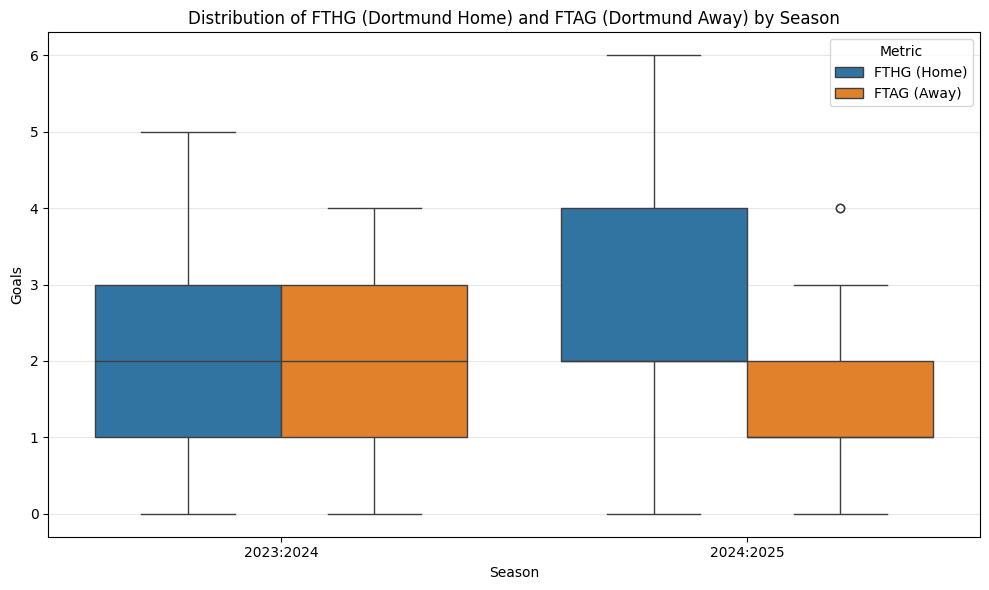

In [ ]:
# Calculate variance for FTHG (Dortmund Home) and FTAG (Dortmund Away) per season
results = []

for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]
    
    # Filter for Dortmund home matches
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    
    # Filter for Dortmund away matches
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    
    # Calculate means
    mean_fthg = dortmund_home['FTHG'].mean()
    mean_ftag = dortmund_away['FTAG'].mean()
    
    # Calculate variances
    var_fthg = dortmund_home['FTHG'].var()
    var_ftag = dortmund_away['FTAG'].var()
    
    # Calculate standard deviations (for reference)
    std_fthg = dortmund_home['FTHG'].std()
    std_ftag = dortmund_away['FTAG'].std()
    
    results.append({
        'Season': season,
        'Mean FTHG (Dortmund Home)': mean_fthg,
        'Mean FTAG (Dortmund Away)': mean_ftag,
        'Variance FTHG (Dortmund Home)': var_fthg,
        'Variance FTAG (Dortmund Away)': var_ftag,
        'Std Dev FTHG (Dortmund Home)': std_fthg,
        'Std Dev FTAG (Dortmund Away)': std_ftag
    })

results_df = pd.DataFrame(results)
print("Mean, Variance, and Standard Deviation for FTHG (Dortmund as Home) and FTAG (Dortmund as Away) per Season:")
display(results_df)

# Create a long-form DataFrame for box plotting FTHG and FTAG distributions per season
import seaborn as sns
import matplotlib.pyplot as plt

boxplot_data = []
for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]

    # Dortmund home FTHG values
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    for v in dortmund_home['FTHG'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'FTHG (Home)',
            'Value': v
        })

    # Dortmund away FTAG values
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    for v in dortmund_away['FTAG'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'FTAG (Away)',
            'Value': v
        })

boxplot_df = pd.DataFrame(boxplot_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_df, x='Season', y='Value', hue='Metric')
plt.title('Distribution of FTHG (Dortmund Home) and FTAG (Dortmund Away) by Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(title='Metric')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Establishing the Statistical Distribution


### Dispersion statistics for Total Goals (FTHG + FTAG)

In [ ]:
# Dispersion statistics for Total Goals (FTHG + FTAG)
# Aggregating across the entire training set (seasons 2023:2024 and 2024:2025)
# Testing for overdispersion using Variance-to-Mean Ratio (VMR)
# Target variable: Total Goals per match (Home Goals + Away Goals)

import numpy as np
import pandas as pd

# Filter for training seasons only
training_seasons = ['2023:2024', '2024:2025']
training_df = merged_df[merged_df['Season'].isin(training_seasons)].copy()

# Create Total Goals variable: FTHG + FTAG for all matches
training_df['TotalGoals'] = training_df['FTHG'] + training_df['FTAG']

# Extract Total Goals across all matches in the training set
total_goals_all = training_df['TotalGoals'].dropna()

# Calculate statistics
def calculate_stats(series: pd.Series, metric_name: str) -> dict:
    """Calculate mean, variance, and VMR for a series."""
    s = pd.to_numeric(series, errors='coerce').dropna()
    
    if s.empty:
        return {
            'Metric': metric_name,
            'N': 0,
            'Mean': np.nan,
            'Variance': np.nan,
            'VMR (Variance/Mean)': np.nan,
        }
    
    mean = float(s.mean())
    var = float(s.var())
    n = int(s.shape[0])
    
    # Calculate VMR: Variance-to-Mean Ratio
    vmr = var / mean if mean > 0 else np.nan
    
    return {
        'Metric': metric_name,
        'N': n,
        'Mean': mean,
        'Variance': var,
        'VMR (Variance/Mean)': vmr,
    }

# Calculate statistics for Total Goals
stats_total_goals = calculate_stats(total_goals_all, 'Total Goals (FTHG + FTAG)')

# Create results DataFrame
dispersion_df = pd.DataFrame([stats_total_goals])

print('Dispersion Statistics for Training Set (Aggregated across 2023:2024 and 2024:2025):')
print('=' * 80)
print(f'Total matches analyzed: {len(total_goals_all)}')
print()
display(dispersion_df)

print('\n' + '=' * 80)
print('Interpretation:')
print('=' * 80)
print()
print('Variance-to-Mean Ratio (VMR) Analysis:')
print()

for _, row in dispersion_df.iterrows():
    metric = row['Metric']
    vmr = row['VMR (Variance/Mean)']
    mean = row['Mean']
    variance = row['Variance']
    n = row['N']
    
    if pd.notna(vmr):
        print(f'{metric}:')
        print(f'  - Sample size (N): {int(n)} matches')
        print(f'  - Mean: {mean:.4f} goals per match')
        print(f'  - Variance: {variance:.4f}')
        print(f'  - VMR: {vmr:.4f}')
        print()
        
        if abs(vmr - 1.0) < 0.1:
            print(f'  → VMR ≈ 1.0: The data follows a Poisson distribution.')
            print(f'    A Poisson regression model is appropriate for predicting total goals.')
        elif vmr > 1.0:
            print(f'  → VMR > 1.0: The data exhibits OVERDISPERSION.')
            print(f'    This suggests that a Negative Binomial distribution may be more appropriate')
            print(f'    than a Poisson distribution for modeling total goals.')
            print(f'    The variance is {vmr:.2f}x greater than the mean, indicating that')
            print(f'    the data has more variability than a Poisson process would predict.')
        else:
            print(f'  → VMR < 1.0: The data exhibits UNDERDISPERSION.')
            print(f'    This is less common but suggests the variance is lower than expected')
            print(f'    under a Poisson assumption.')
        print()


Dispersion Statistics for Training Set (Aggregated across 2023:2024 and 2024:2025):
Total matches analyzed: 612



,Metric,N,Mean,Variance,VMR (Variance/Mean)
0,Total Goals (FTHG + FTAG),612,3.176471,3.14393,0.989756



Interpretation:

Variance-to-Mean Ratio (VMR) Analysis:

Total Goals (FTHG + FTAG):
  - Sample size (N): 612 matches
  - Mean: 3.1765 goals per match
  - Variance: 3.1439
  - VMR: 0.9898

  → VMR ≈ 1.0: The data follows a Poisson distribution.
    A Poisson regression model is appropriate for predicting total goals.



### Empirical vs Fitted Poisson Distribution for Total Goals per Match

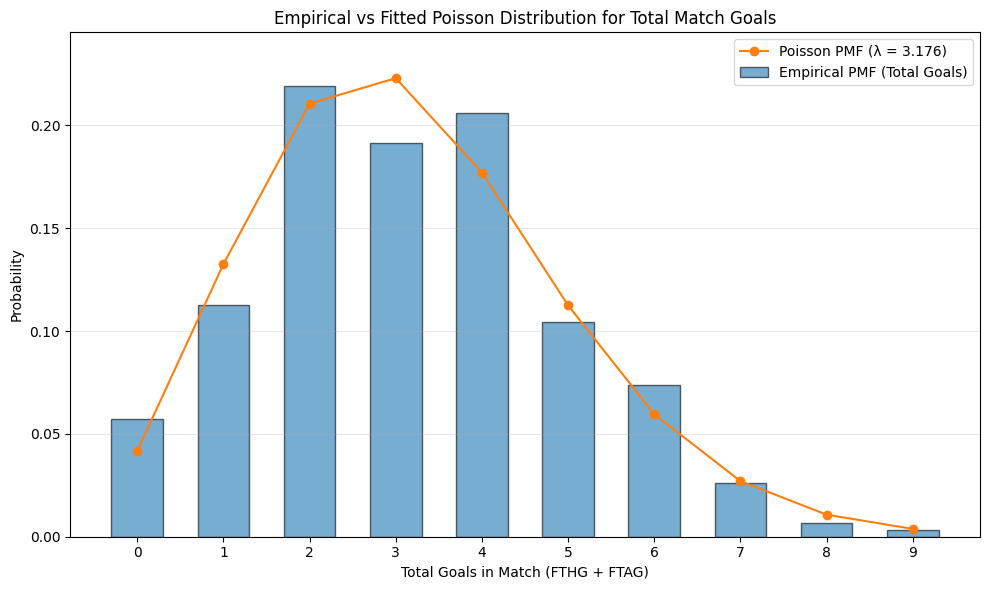

In [ ]:
# Empirical vs Fitted Poisson Distribution for Total Goals per Match

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Use the same training seasons as above
training_seasons = ['2023:2024', '2024:2025']
training_df = merged_df[merged_df['Season'].isin(training_seasons)].copy()

# Compute Total Goals per match
training_df['TotalGoals'] = training_df['FTHG'] + training_df['FTAG']

total_goals = training_df['TotalGoals'].dropna()

# Estimate lambda (λ) as the sample mean of total goals
lambda_hat = total_goals.mean()

# Empirical PMF (relative frequencies)
max_goals = int(total_goals.max())
ks = np.arange(0, max_goals + 1)

empirical_pmf = total_goals.value_counts(normalize=True).reindex(ks).fillna(0.0).values

# Poisson PMF with fitted λ
poisson_pmf = poisson.pmf(ks, mu=lambda_hat)

# Plot
plt.figure(figsize=(10, 6))

# Empirical PMF as bars
plt.bar(ks, empirical_pmf, width=0.6, alpha=0.6, label='Empirical PMF (Total Goals)', color='C0', edgecolor='black')

# Poisson PMF as line with markers
plt.plot(ks, poisson_pmf, 'o-', color='C1', label=f'Poisson PMF (λ = {lambda_hat:.3f})')

plt.xlabel('Total Goals in Match (FTHG + FTAG)')
plt.ylabel('Probability')
plt.title('Empirical vs Fitted Poisson Distribution for Total Match Goals')
plt.xticks(ks)
plt.ylim(0, max(empirical_pmf.max(), poisson_pmf.max()) * 1.1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


At the league level, total goals per Bundesliga match across two seasons are well described by a Poisson process with λ ≈ 3.176.

# Feature Engineering: Adding Minimum Context Variables


### Motivation Proxy (Game Week & Matches Left)

As a season progresses, **motivation** tends to increase for teams with fewer matches left, especially in the final game weeks when relegation, European spots, or the title are at stake.

We approximate a team's *current game week* as the **number of matches that team has already played in the season, plus one**. Because the Bundesliga has 18 clubs, a full season consists of **34 game weeks**, so a team's **Matches Left (ML)** at a given match is:

\[
\text{ML}_{team} = 34 - \text{GW}_{team}
\]

Due to postponements, it is possible for the home and away teams to have different game weeks (and thus different ML) in the same fixture. For motivation-sensitive modeling, we will therefore compute **separate game week and matches-left values for each team** (`HomeGW`, `AwayGW`, `HomeML`, `AwayML`).


In [ ]:
# Motivation Proxy: Game Week (GW) and Matches Left (ML) per team

import pandas as pd

# Ensure Date is datetime for correct chronological ordering
if not pd.api.types.is_datetime64_any_dtype(merged_df['Date']):
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort matches by Season, Date, and original row order for stability
merged_df = merged_df.sort_values(['Season', 'Date']).reset_index(drop=False)
orig_index_col = 'orig_index'
merged_df.rename(columns={'index': orig_index_col}, inplace=True)

# Build long-form table of team appearances
home = merged_df[['Season', 'Date', 'HomeTeam', orig_index_col]].rename(columns={'HomeTeam': 'Team'})
away = merged_df[['Season', 'Date', 'AwayTeam', orig_index_col]].rename(columns={'AwayTeam': 'Team'})

team_matches = pd.concat([home, away], ignore_index=True)
team_matches = team_matches.sort_values(['Season', 'Team', 'Date', orig_index_col])

# Cumulative match count per Season-Team -> Game Week (GW)
team_matches['GW'] = team_matches.groupby(['Season', 'Team']).cumcount() + 1

# Split back into home/away GW tables
home_gw = team_matches.rename(columns={'Team': 'HomeTeam', 'GW': 'HomeGW'})[
    ['Season', 'Date', 'HomeTeam', 'HomeGW', orig_index_col]
]
away_gw = team_matches.rename(columns={'Team': 'AwayTeam', 'GW': 'AwayGW'})[
    ['Season', 'Date', 'AwayTeam', 'AwayGW', orig_index_col]
]

# Merge GW columns back into merged_df
merged_df = merged_df.merge(home_gw, on=['Season', 'Date', 'HomeTeam', orig_index_col], how='left')
merged_df = merged_df.merge(away_gw, on=['Season', 'Date', 'AwayTeam', orig_index_col], how='left')

# Drop helper original-index column now that merges are done
merged_df = merged_df.drop(columns=[orig_index_col])

print("Game Week columns added to merged_df:")
print(merged_df[['Season', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGW', 'AwayGW']].head(10))


Game Week columns added to merged_df:
      Season       Date       HomeTeam       AwayTeam  HomeGW  AwayGW
0  2023:2024 2023-08-18  Werder Bremen  Bayern Munich       1       1
1  2023:2024 2023-08-19       Augsburg     M'gladbach       1       1
2  2023:2024 2023-08-19     Hoffenheim       Freiburg       1       1
3  2023:2024 2023-08-19     Leverkusen     RB Leipzig       1       1
4  2023:2024 2023-08-19      Stuttgart         Bochum       1       1
5  2023:2024 2023-08-19      Wolfsburg     Heidenheim       1       1
6  2023:2024 2023-08-19       Dortmund        FC Koln       1       1
7  2023:2024 2023-08-20   Union Berlin          Mainz       1       1
8  2023:2024 2023-08-20  Ein Frankfurt      Darmstadt       1       1
9  2023:2024 2023-08-25     RB Leipzig      Stuttgart       2       2


/var/folders/3l/3r33nlzx08x33ms97984bk_m0000gn/T/ipykernel_94879/133146329.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [ ]:
# Matches Left (ML) and high-motivation flags based on Game Week

GW_TOTAL = 34  # Bundesliga: 18 clubs -> 34 game weeks

# Compute Matches Left for each team
merged_df['HomeML'] = (GW_TOTAL - merged_df['HomeGW']).clip(lower=0)
merged_df['AwayML'] = (GW_TOTAL - merged_df['AwayGW']).clip(lower=0)

# High motivation in final 5 matches of the season
merged_df['HomeHighMotivation'] = (merged_df['HomeML'] <= 5).astype(int)
merged_df['AwayHighMotivation'] = (merged_df['AwayML'] <= 5).astype(int)

print("Matches Left and motivation flags added to merged_df:")
print(merged_df[['Season', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGW', 'AwayGW', 'HomeML', 'AwayML', 'HomeHighMotivation', 'AwayHighMotivation']].head(10))


Matches Left and motivation flags added to merged_df:
      Season       Date       HomeTeam       AwayTeam  HomeGW  AwayGW  HomeML  \
0  2023:2024 2023-08-18  Werder Bremen  Bayern Munich       1       1      33   
1  2023:2024 2023-08-19       Augsburg     M'gladbach       1       1      33   
2  2023:2024 2023-08-19     Hoffenheim       Freiburg       1       1      33   
3  2023:2024 2023-08-19     Leverkusen     RB Leipzig       1       1      33   
4  2023:2024 2023-08-19      Stuttgart         Bochum       1       1      33   
5  2023:2024 2023-08-19      Wolfsburg     Heidenheim       1       1      33   
6  2023:2024 2023-08-19       Dortmund        FC Koln       1       1      33   
7  2023:2024 2023-08-20   Union Berlin          Mainz       1       1      33   
8  2023:2024 2023-08-20  Ein Frankfurt      Darmstadt       1       1      33   
9  2023:2024 2023-08-25     RB Leipzig      Stuttgart       2       2      32   

   AwayML  HomeHighMotivation  AwayHighMotivation  
0 

**Method B: Within-Season Static Tags**

Note: For this sprint, this method is acceptable (and preferred). It technically uses future matches within the season, true. But, this sprint is not about beating the market by 0.5%, perfect causal purity or real-time deployment

It is about testing structural disagreement, using coarse, stable labels and seeing whether the market prices matchups as simply as one suspects. 

---

Markets themselves:

- Form season priors quickly

- Update aggressively after ~5–8 rounds

- Effectively behave as if these season-level identities exist

So the static tags are acting as:

"This is how this team is generally perceived this season"


**Adding an Opponent-Style Proxy**


In [ ]:
# ============================
# Feature Engineering: Shots-based possession proxy (season-specific)
# Input required columns: Season, HomeTeam, AwayTeam, HS, AS
# Output columns added to match-level dataset: HomeLowPossession, AwayLowPossession
# ============================

import pandas as pd

required_cols = {'Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS'}
missing_cols = required_cols - set(merged_df.columns)
if missing_cols:
    raise ValueError(f"merged_df is missing required columns: {sorted(missing_cols)}")

# 1) Team–season aggregation table (use ONLY HS/AS; no match-specific info beyond that)
home_rows = merged_df[['Season', 'HomeTeam', 'HS', 'AS']].rename(columns={
    'HomeTeam': 'Team',
    'HS': 'ShotsFor',
    'AS': 'ShotsAgainst'
})

away_rows = merged_df[['Season', 'AwayTeam', 'HS', 'AS']].rename(columns={
    'AwayTeam': 'Team',
    'AS': 'ShotsFor',
    'HS': 'ShotsAgainst'
})

team_match_rows = pd.concat([home_rows, away_rows], ignore_index=True)
team_season_agg = (
    team_match_rows
    .groupby(['Season', 'Team'], as_index=False)
    .agg(
        AverageShotsFor=('ShotsFor', 'mean'),
        AverageShotsAgainst=('ShotsAgainst', 'mean'),
    )
)

# 2) Possession proxy label (bottom 6 by AverageShotsFor within each season)
team_season_agg['LowPossession'] = 0
for season, grp in team_season_agg.groupby('Season'):
    bottom6_teams = grp.nsmallest(6, 'AverageShotsFor')['Team']
    team_season_agg.loc[
        (team_season_agg['Season'] == season) & (team_season_agg['Team'].isin(bottom6_teams)),
        'LowPossession'
    ] = 1

# 3) Join back to match-level dataset
home_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'HomeTeam',
    'LowPossession': 'HomeLowPossession'
})

aaway_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'AwayTeam',
    'LowPossession': 'AwayLowPossession'
})

merged_df = merged_df.merge(home_lp, on=['Season', 'HomeTeam'], how='left')
merged_df = merged_df.merge(aaway_lp, on=['Season', 'AwayTeam'], how='left')

# 4) Output: updated match-level dataset with new columns
print('Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):')
display(merged_df[['Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HomeLowPossession', 'AwayLowPossession']].head())

# (Optional) also show the team-season table
print('\nTeam–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):')
display(team_season_agg.sort_values(['Season', 'AverageShotsFor'], ascending=[True, True]).head(20))


Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):


,Season,HomeTeam,AwayTeam,HS,AS,HomeLowPossession,AwayLowPossession
0,2023:2024,Werder Bremen,Bayern Munich,6.0,25.0,1,0
1,2023:2024,Augsburg,M'gladbach,20.0,9.0,0,0
2,2023:2024,Hoffenheim,Freiburg,24.0,17.0,0,1
3,2023:2024,Leverkusen,RB Leipzig,11.0,13.0,0,0
4,2023:2024,Stuttgart,Bochum,19.0,4.0,0,0



Team–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):


,Season,Team,AverageShotsFor,AverageShotsAgainst,LowPossession
8,2023:2024,Heidenheim,11.352941,14.764706,1
5,2023:2024,Ein Frankfurt,11.558824,12.264706,1
7,2023:2024,Freiburg,11.617647,15.000000,1
16,2023:2024,Werder Bremen,11.735294,15.176471,1
3,2023:2024,Darmstadt,11.823529,16.294118,1
15,2023:2024,Union Berlin,11.882353,13.852941,1
17,2023:2024,Wolfsburg,11.970588,12.470588,0
6,2023:2024,FC Koln,12.558824,14.705882,0
0,2023:2024,Augsburg,12.735294,14.941176,0
11,2023:2024,M'gladbach,13.088235,16.558824,0


### Team Capability Metrics from Market Odds

Using pre-match market odds to construct team capability proxies that reflect the market's consensus view of team strength and expected dominance in each match.

- **Inputs**:
  - `AvgH`, `AvgD`, `AvgA`: average home, draw, and away odds (market consensus prices)
  - `AHh`: Asian handicap line for the home team
- **Outputs** (match-level features):
  - `HomeProb_MC`, `DrawProb_MC`, `AwayProb_MC`: margin-adjusted implied probabilities from the 1X2 market
  - `AHh` (kept as-is) as the handicap-based strength signal


In [ ]:
# Construct market-based team capability metrics from AvgH, AvgD, AvgA, and AHh

required_odds_cols = {"AvgH", "AvgD", "AvgA", "AHh"}
missing_odds = required_odds_cols - set(merged_df.columns)
if missing_odds:
    raise ValueError(f"merged_df is missing required odds columns for team capability metrics: {sorted(missing_odds)}")

# Convert odds to numeric and handle any non-numeric values
odds_df = merged_df[list(required_odds_cols)].apply(pd.to_numeric, errors="coerce")

# Raw implied probabilities from 1X2 odds
pH_raw = 1.0 / odds_df["AvgH"]
pD_raw = 1.0 / odds_df["AvgD"]
pA_raw = 1.0 / odds_df["AvgA"]

overround_1x2 = pH_raw + pD_raw + pA_raw

# Margin-adjusted implied probabilities (normalize to sum to 1)
merged_df["HomeProb_MC"] = (pH_raw / overround_1x2).clip(0, 1)
merged_df["DrawProb_MC"] = (pD_raw / overround_1x2).clip(0, 1)
merged_df["AwayProb_MC"] = (pA_raw / overround_1x2).clip(0, 1)

print("Market-based team capability metrics added to merged_df:")
print("  - HomeProb_MC, DrawProb_MC, AwayProb_MC (margin-adjusted implied probabilities)")
print("  - AHh retained as the handicap line feature")



Market-based team capability metrics added to merged_df:
  - HomeProb_MC, DrawProb_MC, AwayProb_MC (margin-adjusted implied probabilities)
  - AHh retained as the handicap line feature


## Sanity Checks


**Count per Season**


In [ ]:
# For each season, check that exactly 6 teams are flagged as LowPossession
lp_count_per_season = team_season_agg.groupby('Season')['LowPossession'].sum().reset_index()
print('\nLowPossession team count per season:')
display(lp_count_per_season)

# Assert for error if any season doesn't have exactly 6 flagged teams
assert all(lp_count_per_season['LowPossession'] == 6), "ERROR: Some season(s) do not have exactly 6 teams flagged as LowPossession."



LowPossession team count per season:


,Season,LowPossession
0,2023:2024,6
1,2024:2025,6


**No Missing Joins**


In [ ]:
# Check that no missing joins occurred: HomeLowPossession and AwayLowPossession have no nulls
assert merged_df['HomeLowPossession'].isnull().sum() == 0, "ERROR: Null values found in HomeLowPossession after merge!"
assert merged_df['AwayLowPossession'].isnull().sum() == 0, "ERROR: Null values found in AwayLowPossession after merge!"
print("No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.")


No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.


## Poisson regression model for Total Match Goals

Fitting a Poisson regression model on Bundesliga match-level data for seasons 2023/2024 and 2024/2025, using **total goals per match** as the response:

- **Response variable**: `TotalGoals = FTHG + FTAG` (total full-time goals in the match)
- **Model**: `TotalGoals ~ C(HomeTeam) + AwayLowPossession`
    - `C(HomeTeam)`: Home team as a categorical fixed effect (team-specific expected total goals at home)
    - `AwayLowPossession`: Binary indicator for whether the away team is labeled as low-possession

The model is fit on the pooled data from the two seasons only, and the output is limited to coefficient tables (coefficients and standard errors), log-likelihood, and AIC.


In [ ]:
# Model C: Poisson GLM for TotalGoals with market-based team capability metrics
# Requires: model_df already defined and containing
#   TotalGoals, C(HomeTeam), AwayLowPossession, HomeProb_MC, AwayProb_MC, AHh

# Sanity check for required columns
required_cols_c = {"TotalGoals", "HomeTeam", "AwayLowPossession", "HomeProb_MC", "AwayProb_MC", "AHh"}
missing_c = required_cols_c - set(model_df.columns)
if missing_c:
    raise ValueError(f"Model C is missing required columns in model_df: {sorted(missing_c)}")

model_c_total = smf.glm(
    formula="TotalGoals ~ C(HomeTeam) + AwayLowPossession + HomeProb_MC + AwayProb_MC + AHh",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_c_total = pd.DataFrame({
    "coef": model_c_total.params,
    "std_err": model_c_total.bse,
})

print("Model C: Poisson GLM, TotalGoals ~ C(HomeTeam) + AwayLowPossession + HomeProb_MC + AwayProb_MC + AHh (seasons 2023/2024 & 2024/2025)")
display(coef_table_c_total)
print(f"Log-likelihood: {model_c_total.llf:.3f}")
print(f"AIC: {model_c_total.aic:.3f}")



Model C: Poisson GLM, TotalGoals ~ C(HomeTeam) + AwayLowPossession + HomeProb_MC + AwayProb_MC + AHh (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,-0.081811,0.490562
C(HomeTeam)[T.Bayern Munich],0.311911,0.182719
C(HomeTeam)[T.Bochum],0.131474,0.144382
C(HomeTeam)[T.Darmstadt],0.215983,0.169736
C(HomeTeam)[T.Dortmund],0.272717,0.148283
C(HomeTeam)[T.Ein Frankfurt],0.225274,0.142808
C(HomeTeam)[T.FC Koln],-0.053757,0.185578
C(HomeTeam)[T.Freiburg],0.254282,0.141080
C(HomeTeam)[T.Heidenheim],0.105451,0.145161
C(HomeTeam)[T.Hoffenheim],0.303665,0.139010


Log-likelihood: -1175.995
AIC: 2399.990


In [ ]:
%pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Use only the requested seasons (2023/2024 and 2024/2025)
model_df = merged_df[merged_df["Season"].isin(["2023:2024", "2024:2025"])].copy()

# Create TotalGoals response variable
model_df["TotalGoals"] = model_df["FTHG"] + model_df["FTAG"]

# Ensure required columns are present
required_cols = {"Season", "HomeTeam", "TotalGoals", "AwayLowPossession"}
missing = required_cols - set(model_df.columns)
if missing:
    raise ValueError(f"Missing required columns for modeling: {sorted(missing)}")

# -----------------------------
# Model A (baseline): TotalGoals ~ 1
# -----------------------------
model_a_total = smf.glm(
    formula="TotalGoals ~ 1",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_a_total = (
    pd.DataFrame({
        "coef": model_a_total.params,
        "std_err": model_a_total.bse,
    })
)

print("Model A: Poisson GLM, TotalGoals ~ 1 (seasons 2023/2024 & 2024/2025)")
display(coef_table_a_total)
print(f"Log-likelihood: {model_a_total.llf:.3f}")
print(f"AIC: {model_a_total.aic:.3f}")

# -----------------------------
# Model B (with covariates): TotalGoals ~ C(HomeTeam) + AwayLowPossession
# -----------------------------
model_b_total = smf.glm(
    formula="TotalGoals ~ C(HomeTeam) + AwayLowPossession",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_b_total = (
    pd.DataFrame({
        "coef": model_b_total.params,
        "std_err": model_b_total.bse,
    })
)

print("\nModel B: Poisson GLM, TotalGoals ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)")
display(coef_table_b_total)
print(f"Log-likelihood: {model_b_total.llf:.3f}")
print(f"AIC: {model_b_total.aic:.3f}")


Model A: Poisson GLM, TotalGoals ~ 1 (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,1.155771,0.02268


Log-likelihood: -1207.025
AIC: 2416.049

Model B: Poisson GLM, TotalGoals ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,1.021568,0.106385
C(HomeTeam)[T.Bayern Munich],0.402522,0.136293
C(HomeTeam)[T.Bochum],0.149073,0.143974
C(HomeTeam)[T.Darmstadt],0.266404,0.167517
C(HomeTeam)[T.Dortmund],0.308703,0.138959
C(HomeTeam)[T.Ein Frankfurt],0.227578,0.141282
C(HomeTeam)[T.FC Koln],-0.040971,0.185388
C(HomeTeam)[T.Freiburg],0.249309,0.140477
C(HomeTeam)[T.Heidenheim],0.120692,0.144627
C(HomeTeam)[T.Hoffenheim],0.316866,0.138719


Log-likelihood: -1179.159
AIC: 2400.318


Intercept (Baseline)

Intercept = 1.02

Baseline expected total goals: e1.02 ≈ **2.77**

This is the league-average total goals per match for the reference home team when AwayLowPossession = 0.

HomeTeam Coefficients

Each HomeTeam coefficient tells how goal-rich matches tend to be when that team is at home, relative to the reference team.

Bayern Munich (0.40) → e0.40 ≈ **1.49**
→ Matches with Bayern at home have ~49% more total goals than baseline.

## Predict Expected Home Goals for 2025/2026 Season

This section loads the 2025/2026 Bundesliga fixtures, computes the `AwayLowPossession` feature using carry-forward from the 2024/2025 season, and uses Model B to predict expected home goals (λ) for each upcoming match.


In [ ]:
# Load 2025/2026 fixtures
from pathlib import Path

project_root = Path().resolve()
data_path_2025_2026 = project_root / "Data" / "2025:2026.csv"

upcoming_df = pd.read_csv(data_path_2025_2026)

# Select required columns: Date, HomeTeam, AwayTeam
upcoming_df = upcoming_df[['Date', 'HomeTeam', 'AwayTeam']].copy()

print(f"Loaded {len(upcoming_df)} fixtures for 2025/2026 season")
display(upcoming_df.head())


Loaded 170 fixtures for 2025/2026 season


,Date,HomeTeam,AwayTeam
0,22/08/2025,Bayern Munich,RB Leipzig
1,23/08/2025,Ein Frankfurt,Werder Bremen
2,23/08/2025,Freiburg,Augsburg
3,23/08/2025,Heidenheim,Wolfsburg
4,23/08/2025,Leverkusen,Hoffenheim


In [ ]:
# Compute AwayLowPossession using carry-forward from 2024/2025 season

# Check that team_season_agg exists (from feature engineering section)
if 'team_season_agg' not in globals():
    raise NameError("`team_season_agg` not found. Run the cell that builds the team–season table first (Cell 30).")

# 1. Extract LowPossession labels from 2024/2025 season
prev_season_mask = team_season_agg['Season'] == '2024:2025'
prev_season_lp = team_season_agg.loc[prev_season_mask, ['Team', 'LowPossession']].rename(
    columns={'LowPossession': 'LowPossession_25_26'}
)

# 2. Get all teams appearing in 2025/2026 fixtures (home or away)
teams_25_26 = pd.Index(sorted(set(upcoming_df['HomeTeam']) | set(upcoming_df['AwayTeam'])))

# 3. Create lookup table: start from all 25/26 teams and left-join their 24/25 LowPossession label
lookup_25_26 = (
    pd.DataFrame({'Team': teams_25_26})
    .merge(prev_season_lp, on='Team', how='left')
)

# 4. For teams not present in 2024/2025 (promoted teams), set LowPossession_25_26 = 1
lookup_25_26['LowPossession_25_26'] = lookup_25_26['LowPossession_25_26'].fillna(1).astype(int)

# 5. Join the lookup into upcoming fixtures to create AwayLowPossession
upcoming_df = upcoming_df.merge(
    lookup_25_26[['Team', 'LowPossession_25_26']],
    left_on='AwayTeam',
    right_on='Team',
    how='left'
)

upcoming_df = upcoming_df.drop(columns=['Team'])
upcoming_df = upcoming_df.rename(columns={'LowPossession_25_26': 'AwayLowPossession'})

# Verify the column was added
print(f"AwayLowPossession computed. Summary:")
print(f"  - Total fixtures: {len(upcoming_df)}")
print(f"  - AwayLowPossession = 1: {upcoming_df['AwayLowPossession'].sum()}")
print(f"  - AwayLowPossession = 0: {(upcoming_df['AwayLowPossession'] == 0).sum()}")
display(upcoming_df[['Date', 'HomeTeam', 'AwayTeam', 'AwayLowPossession']].head())


AwayLowPossession computed. Summary:
  - Total fixtures: 170
  - AwayLowPossession = 1: 66
  - AwayLowPossession = 0: 104


,Date,HomeTeam,AwayTeam,AwayLowPossession
0,22/08/2025,Bayern Munich,RB Leipzig,0
1,23/08/2025,Ein Frankfurt,Werder Bremen,0
2,23/08/2025,Freiburg,Augsburg,1
3,23/08/2025,Heidenheim,Wolfsburg,0
4,23/08/2025,Leverkusen,Hoffenheim,0


In [ ]:
# Predict expected home goals (lambda_FTHG) using Model B

# Check that model_b and model_df exist (from Model B fitting section)
if 'model_b' not in globals():
    raise NameError("`model_b` not found. Run the cell that fits Model B (Poisson regression) first (Cell 38).")
if 'model_df' not in globals():
    raise NameError("`model_df` not found. Run the cell that fits Model B (Poisson regression) first (Cell 38).")

# Ensure required predictors for Model B are present
required_model_cols = {"HomeTeam", "AwayLowPossession"}
missing_model_cols = required_model_cols - set(upcoming_df.columns)
if missing_model_cols:
    raise ValueError(f"upcoming_df is missing required model columns: {sorted(missing_model_cols)}")

# 1) Filter to only fixtures where HomeTeam was seen in the training data
train_home_teams = model_df['HomeTeam'].unique()
mask_known = upcoming_df['HomeTeam'].isin(train_home_teams)

known_upcoming = upcoming_df.loc[mask_known].copy()
promoted_upcoming = upcoming_df.loc[~mask_known].copy()

print(f"Total fixtures: {len(upcoming_df)}")
print(f"  - Known HomeTeams (can predict): {len(known_upcoming)}")
print(f"  - Promoted HomeTeams (cannot predict): {len(promoted_upcoming)}")

if len(promoted_upcoming) > 0:
    promoted_teams = promoted_upcoming['HomeTeam'].unique()
    print(f"  - Promoted teams: {', '.join(sorted(promoted_teams))}")

# 2) Predict lambda_FTHG only for known teams
upcoming_df = upcoming_df.copy()
upcoming_df["lambda_FTHG"] = None  # Initialize with None

if len(known_upcoming) > 0:
    known_upcoming["lambda_FTHG"] = model_b.predict(known_upcoming)
    # Update the main dataframe with predictions for known teams
    upcoming_df.loc[mask_known, "lambda_FTHG"] = known_upcoming["lambda_FTHG"].values

# 3) Handle promoted teams separately (set to NaN or use a default)
# For now, we'll leave them as None/NaN to indicate they cannot be predicted
if len(promoted_upcoming) > 0:
    print(f"\nNote: Promoted teams cannot be predicted by Model B (no training data).")
    print(f"      Their lambda_FTHG values are set to NaN.")

print(f"\nPredicted lambda_FTHG for {len(known_upcoming)} fixtures (known teams only)")
if len(known_upcoming) > 0:
    print(f"  - Mean lambda_FTHG: {known_upcoming['lambda_FTHG'].mean():.3f}")
    print(f"  - Min lambda_FTHG: {known_upcoming['lambda_FTHG'].min():.3f}")
    print(f"  - Max lambda_FTHG: {known_upcoming['lambda_FTHG'].max():.3f}")


Total fixtures: 170
  - Known HomeTeams (can predict): 161
  - Promoted HomeTeams (cannot predict): 9
  - Promoted teams: Hamburg

Note: Promoted teams cannot be predicted by Model B (no training data).
      Their lambda_FTHG values are set to NaN.

Predicted lambda_FTHG for 161 fixtures (known teams only)
  - Mean lambda_FTHG: 1.727
  - Min lambda_FTHG: 0.583
  - Max lambda_FTHG: 3.176


In [ ]:
# Compute over-line probabilities and display final results

from scipy.stats import poisson
import numpy as np

# Verify lambda_FTHG exists
if 'lambda_FTHG' not in upcoming_df.columns:
    raise ValueError("lambda_FTHG column not found. Run the prediction cell first.")

# Compute over-line probabilities for matches with valid lambda_FTHG
# P_over_0_5 = P(FTHG ≥ 1) = 1 - P(FTHG ≤ 0)
# P_over_1_5 = P(FTHG ≥ 2) = 1 - P(FTHG ≤ 1)
# P_over_2_5 = P(FTHG ≥ 3) = 1 - P(FTHG ≤ 2)
# P_over_3_5 = P(FTHG ≥ 4) = 1 - P(FTHG ≤ 3)

upcoming_df = upcoming_df.copy()

# Initialize probability columns with NaN
upcoming_df["P_over_0_5"] = np.nan
upcoming_df["P_over_1_5"] = np.nan
upcoming_df["P_over_2_5"] = np.nan
upcoming_df["P_over_3_5"] = np.nan

# Compute probabilities only for rows with valid lambda_FTHG
mask_valid = upcoming_df['lambda_FTHG'].notna()
if mask_valid.sum() > 0:
    # Convert to numeric array to avoid dtype issues
    mu = pd.to_numeric(upcoming_df.loc[mask_valid, "lambda_FTHG"], errors='coerce')
    # Filter out any NaN that might have been introduced
    mu_valid = mu.dropna()
    valid_indices = mu_valid.index
    
    if len(mu_valid) > 0:
        # Convert to numpy array for scipy compatibility
        mu_array = mu_valid.values.astype(float)
        
        # Compute probabilities
        upcoming_df.loc[valid_indices, "P_over_0_5"] = 1 - poisson.cdf(0, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_1_5"] = 1 - poisson.cdf(1, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_2_5"] = 1 - poisson.cdf(2, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_3_5"] = 1 - poisson.cdf(3, mu=mu_array)

# Select output columns
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_FTHG',
    'P_over_0_5',
    'P_over_1_5',
    'P_over_2_5',
    'P_over_3_5',
]

# Verify all columns exist
missing_cols = set(output_cols) - set(upcoming_df.columns)
if missing_cols:
    raise ValueError(f"Missing required columns: {sorted(missing_cols)}")

# Create output DataFrame and sort by Date
output_df = upcoming_df[output_cols].copy()
output_df = output_df.sort_values('Date').reset_index(drop=True)

# Count predictions vs missing values
predicted_count = output_df['lambda_FTHG'].notna().sum()
missing_count = output_df['lambda_FTHG'].isna().sum()

print("Expected Home Goals (lambda_FTHG) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:")
print("=" * 80)
print(f"Total fixtures: {len(output_df)}")
print(f"  - With predictions (known HomeTeams): {predicted_count}")
print(f"  - Missing predictions (promoted HomeTeams): {missing_count}")
print()
print("Columns:")
print("  - lambda_FTHG: Expected home goals (λ)")
print("  - P_over_0_5: P(FTHG ≥ 1)")
print("  - P_over_1_5: P(FTHG ≥ 2)")
print("  - P_over_2_5: P(FTHG ≥ 3)")
print("  - P_over_3_5: P(FTHG ≥ 4)")
print()

display(output_df)


Expected Home Goals (lambda_FTHG) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:
Total fixtures: 170
  - With predictions (known HomeTeams): 161
  - Missing predictions (promoted HomeTeams): 9

Columns:
  - lambda_FTHG: Expected home goals (λ)
  - P_over_0_5: P(FTHG ≥ 1)
  - P_over_1_5: P(FTHG ≥ 2)
  - P_over_2_5: P(FTHG ≥ 3)
  - P_over_3_5: P(FTHG ≥ 4)



,Date,HomeTeam,AwayTeam,lambda_FTHG,P_over_0_5,P_over_1_5,P_over_2_5,P_over_3_5
0,01/11/2025,Heidenheim,Ein Frankfurt,1.253878,0.714604,0.356752,0.132401,0.038632
1,01/11/2025,Bayern Munich,Leverkusen,3.08567,0.954301,0.813287,0.595727,0.371954
2,01/11/2025,Union Berlin,Freiburg,1.200645,0.699000,0.337606,0.120653,0.033825
3,01/11/2025,St Pauli,M'gladbach,0.583199,0.441890,0.116401,0.021488,0.003037
4,01/11/2025,RB Leipzig,Stuttgart,2.125037,0.880571,0.626781,0.357125,0.166115
...,...,...,...,...,...,...,...,...
165,30/11/2025,Hamburg,Stuttgart,None,NaN,NaN,NaN,NaN
166,31/08/2025,Dortmund,Union Berlin,2.427151,0.911712,0.697424,0.437369,0.226971
167,31/08/2025,FC Koln,Freiburg,0.898945,0.593001,0.227132,0.062683,0.013407
168,31/08/2025,Wolfsburg,Mainz,1.513725,0.779911,0.446758,0.194606,0.067377


## Model vs Market: Delta Table for Over 2.5 Goals

This section compares the model's ex-ante Over 2.5 goals probability (`P_over_2_5`) with margin-adjusted market probabilities derived from Betbrain average odds.

**Key points:**
- We use pre-match Betbrain odds (average across bookmakers)
- Realized goals (FTHG, FTAG) are **NOT** used in probability calculations
- Market probabilities are margin-adjusted to remove bookmaker overround
- The delta metric shows where the model disagrees with the market


In [ ]:
# Load Betbrain odds and merge with model predictions

from pathlib import Path
import pandas as pd

# Load 2025/2026 data to get Betbrain odds
project_root = Path().resolve()
data_path_2025_2026 = project_root / "Data" / "2025:2026.csv"

odds_df = pd.read_csv(data_path_2025_2026)

# Extract required columns: Date, HomeTeam, AwayTeam, and Betbrain average odds
# Note: In football-data.co.uk format, "Avg>2.5" and "Avg<2.5" represent Betbrain average odds
odds_cols = ['Date', 'HomeTeam', 'AwayTeam', 'Avg>2.5', 'Avg<2.5']
missing_odds_cols = set(odds_cols) - set(odds_df.columns)

if missing_odds_cols:
    # Try alternative column names
    if 'BbAv>2.5' in odds_df.columns and 'BbAv<2.5' in odds_df.columns:
        odds_cols = ['Date', 'HomeTeam', 'AwayTeam', 'BbAv>2.5', 'BbAv<2.5']
    else:
        raise ValueError(f"Missing required odds columns: {sorted(missing_odds_cols)}. Available columns: {[c for c in odds_df.columns if '2.5' in c]}")

odds_subset = odds_df[odds_cols].copy()

# Check that upcoming_df exists and has the required model predictions
if 'upcoming_df' not in globals():
    raise NameError("`upcoming_df` not found. Run the prediction cells first.")

# Merge odds with model predictions
# Use Date, HomeTeam, AwayTeam as merge keys
delta_df = upcoming_df.merge(
    odds_subset,
    on=['Date', 'HomeTeam', 'AwayTeam'],
    how='inner'
)

print(f"Merged {len(delta_df)} matches with both model predictions and Betbrain odds")
print(f"  - Matches with valid lambda_FTHG: {delta_df['lambda_FTHG'].notna().sum()}")
print(f"  - Matches with valid P_over_2_5: {delta_df['P_over_2_5'].notna().sum()}")

# Get the column names for odds (handles both naming conventions)
over_odds_col = 'BbAv>2.5' if 'BbAv>2.5' in delta_df.columns else 'Avg>2.5'
under_odds_col = 'BbAv<2.5' if 'BbAv<2.5' in delta_df.columns else 'Avg<2.5'

print(f"  - Matches with valid {over_odds_col}: {delta_df[over_odds_col].notna().sum()}")
print(f"  - Matches with valid {under_odds_col}: {delta_df[under_odds_col].notna().sum()}")

display(delta_df[['Date', 'HomeTeam', 'AwayTeam', 'lambda_FTHG', 'P_over_2_5', over_odds_col, under_odds_col]].head())


Merged 170 matches with both model predictions and Betbrain odds
  - Matches with valid lambda_FTHG: 161
  - Matches with valid P_over_2_5: 161
  - Matches with valid Avg>2.5: 170
  - Matches with valid Avg<2.5: 170


,Date,HomeTeam,AwayTeam,lambda_FTHG,P_over_2_5,Avg>2.5,Avg<2.5
0,22/08/2025,Bayern Munich,RB Leipzig,3.08567,0.595727,1.24,3.91
1,23/08/2025,Ein Frankfurt,Werder Bremen,2.03945,0.334000,1.55,2.35
2,23/08/2025,Freiburg,Augsburg,1.800968,0.269638,1.89,1.87
3,23/08/2025,Heidenheim,Wolfsburg,1.253878,0.132401,1.68,2.12
4,23/08/2025,Leverkusen,Hoffenheim,2.416138,0.434502,1.46,2.62


In [ ]:
# Compute margin-adjusted market probabilities from Betbrain odds

import numpy as np

# Get the column names for odds
over_odds_col = 'BbAv>2.5' if 'BbAv>2.5' in delta_df.columns else 'Avg>2.5'
under_odds_col = 'BbAv<2.5' if 'BbAv<2.5' in delta_df.columns else 'Avg<2.5'

# Convert odds to numeric, handling any non-numeric values
delta_df[over_odds_col] = pd.to_numeric(delta_df[over_odds_col], errors='coerce')
delta_df[under_odds_col] = pd.to_numeric(delta_df[under_odds_col], errors='coerce')

# Compute raw implied probabilities
# p_over_raw = 1 / odds_over
# p_under_raw = 1 / odds_under
delta_df['p_over_raw'] = 1.0 / delta_df[over_odds_col]
delta_df['p_under_raw'] = 1.0 / delta_df[under_odds_col]

# Compute overround: R = p_over_raw + p_under_raw
# The overround represents the bookmaker's margin
delta_df['overround'] = delta_df['p_over_raw'] + delta_df['p_under_raw']

# Compute margin-adjusted probabilities
# P_market_over_2_5 = p_over_raw / R
# This normalizes the probabilities to sum to 1, removing the bookmaker margin
delta_df['P_market_over_2_5'] = delta_df['p_over_raw'] / delta_df['overround']

# Ensure probabilities are bounded [0, 1]
delta_df['P_market_over_2_5'] = delta_df['P_market_over_2_5'].clip(0, 1)

# Handle edge cases:
# - Invalid odds (≤ 1.0) would give probabilities > 1, already handled by clip
# - Division by zero (if overround is 0 or NaN)
delta_df.loc[delta_df['overround'] <= 0, 'P_market_over_2_5'] = np.nan
delta_df.loc[delta_df['overround'].isna(), 'P_market_over_2_5'] = np.nan

# Display summary statistics
print("Market Probability Computation Summary:")
print("=" * 80)
print(f"Total matches: {len(delta_df)}")
print(f"  - Valid odds (both over and under): {delta_df[[over_odds_col, under_odds_col]].notna().all(axis=1).sum()}")
print(f"  - Valid P_market_over_2_5: {delta_df['P_market_over_2_5'].notna().sum()}")
print(f"\nOverround statistics:")
print(f"  - Mean overround: {delta_df['overround'].mean():.4f}")
print(f"  - Min overround: {delta_df['overround'].min():.4f}")
print(f"  - Max overround: {delta_df['overround'].max():.4f}")
print(f"\nMarket probability statistics:")
print(f"  - Mean P_market_over_2_5: {delta_df['P_market_over_2_5'].mean():.4f}")
print(f"  - Min P_market_over_2_5: {delta_df['P_market_over_2_5'].min():.4f}")
print(f"  - Max P_market_over_2_5: {delta_df['P_market_over_2_5'].max():.4f}")

display(delta_df[['Date', 'HomeTeam', 'AwayTeam', over_odds_col, under_odds_col, 'overround', 'P_market_over_2_5']].head())


Market Probability Computation Summary:
Total matches: 170
  - Valid odds (both over and under): 170
  - Valid P_market_over_2_5: 170

Overround statistics:
  - Mean overround: 1.0670
  - Min overround: 1.0615
  - Max overround: 1.0720

Market probability statistics:
  - Mean P_market_over_2_5: 0.5938
  - Min P_market_over_2_5: 0.3621
  - Max P_market_over_2_5: 0.8037


,Date,HomeTeam,AwayTeam,Avg>2.5,Avg<2.5,overround,P_market_over_2_5
0,22/08/2025,Bayern Munich,RB Leipzig,1.24,3.91,1.062206,0.759223
1,23/08/2025,Ein Frankfurt,Werder Bremen,1.55,2.35,1.070693,0.602564
2,23/08/2025,Freiburg,Augsburg,1.89,1.87,1.063860,0.497340
3,23/08/2025,Heidenheim,Wolfsburg,1.68,2.12,1.066936,0.557895
4,23/08/2025,Leverkusen,Hoffenheim,1.46,2.62,1.066611,0.642157


In [ ]:
# Compute delta metric and build output table

# Compute delta: model probability - market probability
delta_df['delta_over_2_5'] = delta_df['P_over_2_5'] - delta_df['P_market_over_2_5']

# Filter to only rows with valid predictions and odds
# We need both model predictions and market probabilities
valid_mask = (
    delta_df['lambda_FTHG'].notna() &
    delta_df['P_over_2_5'].notna() &
    delta_df['P_market_over_2_5'].notna()
)

delta_table = delta_df.loc[valid_mask].copy()

# Rename P_over_2_5 to P_model_over_2_5 for clarity
delta_table = delta_table.rename(columns={'P_over_2_5': 'P_model_over_2_5'})

# Create output DataFrame with requested columns
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_FTHG',
    'P_model_over_2_5',
    'P_market_over_2_5',
    'delta_over_2_5',
]

# Select and reorder columns
delta_table = delta_table[output_cols].copy()

# Sort by Date
delta_table = delta_table.sort_values('Date').reset_index(drop=True)

print(f"Delta table created with {len(delta_table)} matches")
print(f"  - Matches with valid model and market probabilities: {len(delta_table)}")
print(f"  - Matches excluded (missing data): {len(delta_df) - len(delta_table)}")

display(delta_table.head(10))


Delta table created with 161 matches
  - Matches with valid model and market probabilities: 161
  - Matches excluded (missing data): 9


,Date,HomeTeam,AwayTeam,lambda_FTHG,P_model_over_2_5,P_market_over_2_5,delta_over_2_5
0,01/11/2025,Bayern Munich,Leverkusen,3.08567,0.595727,0.750499,-0.154772
1,01/11/2025,Union Berlin,Freiburg,1.200645,0.120653,0.449735,-0.329083
2,01/11/2025,St Pauli,M'gladbach,0.583199,0.021488,0.505348,-0.483859
3,01/11/2025,RB Leipzig,Stuttgart,2.125037,0.357125,0.661871,-0.304746
4,01/11/2025,Mainz,Werder Bremen,1.368174,0.158865,0.604592,-0.445727
5,01/11/2025,Heidenheim,Ein Frankfurt,1.253878,0.132401,0.637931,-0.505530
6,02/11/2025,Wolfsburg,Hoffenheim,1.513725,0.194606,0.609694,-0.415088
7,02/11/2025,FC Koln,Hamburg,0.898945,0.062683,0.579221,-0.516537
8,03/10/2025,Hoffenheim,FC Koln,1.67803,0.236989,0.612658,-0.375669
9,04/10/2025,Ein Frankfurt,Bayern Munich,2.03945,0.334000,0.734440,-0.400440


In [ ]:
# Display full delta table and perform sanity checks

print("=" * 80)
print("DELTA TABLE: Model vs Market Probabilities for Over 2.5 Goals")
print("=" * 80)
print()

# Display the full table
display(delta_table)

print("\n" + "=" * 80)
print("SANITY CHECKS")
print("=" * 80)
print()

# 1. Verify probability ranges: P_model and P_market should be in [0, 1]
p_model_min = delta_table['P_model_over_2_5'].min()
p_model_max = delta_table['P_model_over_2_5'].max()
p_market_min = delta_table['P_market_over_2_5'].min()
p_market_max = delta_table['P_market_over_2_5'].max()

print("1. Probability Range Checks:")
print(f"   P_model_over_2_5: [{p_model_min:.4f}, {p_model_max:.4f}]")
if p_model_min < 0 or p_model_max > 1:
    print("   ⚠️  WARNING: P_model_over_2_5 is outside [0, 1] range!")
else:
    print("   ✓ P_model_over_2_5 is within [0, 1] range")

print(f"   P_market_over_2_5: [{p_market_min:.4f}, {p_market_max:.4f}]")
if p_market_min < 0 or p_market_max > 1:
    print("   ⚠️  WARNING: P_market_over_2_5 is outside [0, 1] range!")
else:
    print("   ✓ P_market_over_2_5 is within [0, 1] range")

# 2. Check delta range (typically [-1, 1])
delta_min = delta_table['delta_over_2_5'].min()
delta_max = delta_table['delta_over_2_5'].max()

print(f"\n2. Delta Range Check:")
print(f"   delta_over_2_5: [{delta_min:.4f}, {delta_max:.4f}]")
if delta_min < -1 or delta_max > 1:
    print("   ⚠️  WARNING: delta_over_2_5 is outside [-1, 1] range!")
else:
    print("   ✓ delta_over_2_5 is within [-1, 1] range")

# 3. Summary statistics
print(f"\n3. Summary Statistics:")
print(f"   Mean delta_over_2_5: {delta_table['delta_over_2_5'].mean():.4f}")
print(f"   Std dev delta_over_2_5: {delta_table['delta_over_2_5'].std():.4f}")
print(f"   Median delta_over_2_5: {delta_table['delta_over_2_5'].median():.4f}")

# 4. Count matches with positive/negative deltas
positive_delta = (delta_table['delta_over_2_5'] > 0).sum()
negative_delta = (delta_table['delta_over_2_5'] < 0).sum()
zero_delta = (delta_table['delta_over_2_5'] == 0).sum()

print(f"\n4. Delta Distribution:")
print(f"   Matches where model > market (positive delta): {positive_delta} ({100*positive_delta/len(delta_table):.1f}%)")
print(f"   Matches where model < market (negative delta): {negative_delta} ({100*negative_delta/len(delta_table):.1f}%)")
print(f"   Matches where model = market (zero delta): {zero_delta} ({100*zero_delta/len(delta_table):.1f}%)")

# 5. Expected goals summary
print(f"\n5. Expected Goals (λ) Summary:")
print(f"   Mean lambda_FTHG: {delta_table['lambda_FTHG'].mean():.4f}")
print(f"   Min lambda_FTHG: {delta_table['lambda_FTHG'].min():.4f}")
print(f"   Max lambda_FTHG: {delta_table['lambda_FTHG'].max():.4f}")

print("\n" + "=" * 80)
print("Delta table is ready for analysis.")
print("=" * 80)


DELTA TABLE: Model vs Market Probabilities for Over 2.5 Goals



,Date,HomeTeam,AwayTeam,lambda_FTHG,P_model_over_2_5,P_market_over_2_5,delta_over_2_5
0,01/11/2025,Bayern Munich,Leverkusen,3.08567,0.595727,0.750499,-0.154772
1,01/11/2025,Union Berlin,Freiburg,1.200645,0.120653,0.449735,-0.329083
2,01/11/2025,St Pauli,M'gladbach,0.583199,0.021488,0.505348,-0.483859
3,01/11/2025,RB Leipzig,Stuttgart,2.125037,0.357125,0.661871,-0.304746
4,01/11/2025,Mainz,Werder Bremen,1.368174,0.158865,0.604592,-0.445727
...,...,...,...,...,...,...,...
156,30/11/2025,Ein Frankfurt,Wolfsburg,2.03945,0.334000,0.641278,-0.307278
157,31/08/2025,FC Koln,Freiburg,0.898945,0.062683,0.476064,-0.413381
158,31/08/2025,Dortmund,Union Berlin,2.427151,0.437369,0.629353,-0.191985
159,31/08/2025,Wolfsburg,Mainz,1.513725,0.194606,0.544974,-0.350367



SANITY CHECKS

1. Probability Range Checks:
   P_model_over_2_5: [0.0215, 0.6151]
   ✓ P_model_over_2_5 is within [0, 1] range
   P_market_over_2_5: [0.3621, 0.8037]
   ✓ P_market_over_2_5 is within [0, 1] range

2. Delta Range Check:
   delta_over_2_5: [-0.6964, -0.0532]
   ✓ delta_over_2_5 is within [-1, 1] range

3. Summary Statistics:
   Mean delta_over_2_5: -0.3383
   Std dev delta_over_2_5: 0.1224
   Median delta_over_2_5: -0.3615

4. Delta Distribution:
   Matches where model > market (positive delta): 0 (0.0%)
   Matches where model < market (negative delta): 161 (100.0%)
   Matches where model = market (zero delta): 0 (0.0%)

5. Expected Goals (λ) Summary:
   Mean lambda_FTHG: 1.7265
   Min lambda_FTHG: 0.5832
   Max lambda_FTHG: 3.1763

Delta table is ready for analysis.
